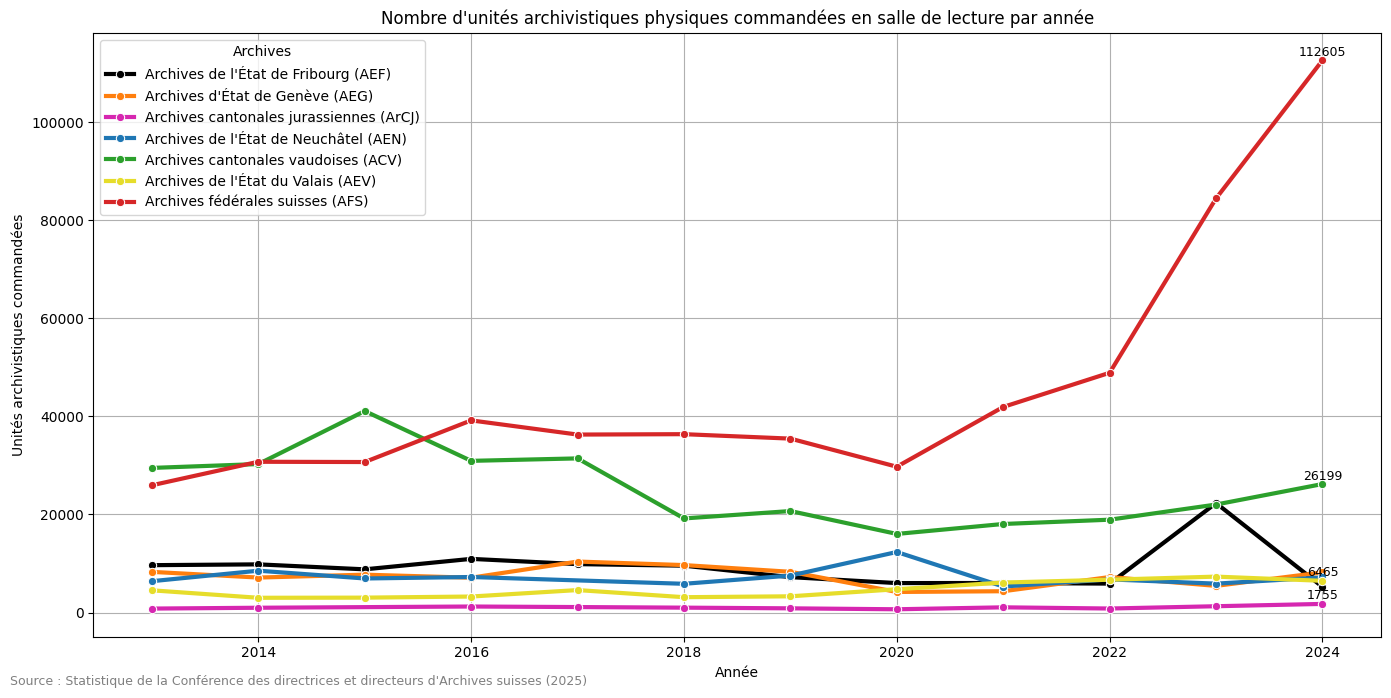

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Charger les données
df = pd.read_excel("statistiques_archives_suisses.xlsx")
df_clean = df[['archives', 'Date', "Nombre d'unités archivistiques commandées"]].copy()
df_clean.columns = ['Archives', 'Année', 'Unités_archivistiques_commandées']

# 2. Conversion des types
df_clean['Année'] = pd.to_numeric(df_clean['Année'], errors='coerce')
df_clean['Unités_archivistiques_commandées'] = pd.to_numeric(df_clean['Unités_archivistiques_commandées'], errors='coerce')

# 3. Grille complète Année × Archives
archives_uniques = df_clean['Archives'].dropna().unique()
annees = range(int(df_clean['Année'].min()), int(df_clean['Année'].max()) + 1)
grille = pd.MultiIndex.from_product([annees, archives_uniques], names=['Année', 'Archives']).to_frame(index=False)
df_complet = pd.merge(grille, df_clean, on=['Année', 'Archives'], how='left')

# 4. Palette : assigner manuellement certaines couleurs, auto-générer pour les autres
palette_custom_base = {
    "Archives d'État de Genève (AEG)": '#ff7f0e',
    "Archives cantonales vaudoises (ACV)": '#2ca02c',
    "Archives de l'état de Neuchatel": "#b6f550",
    "Archives cantonales jurassiennes (ArCJ)": "#d627b0",
    "Archives de l'État de Fribourg (AEF)": "#000000",
    "Archives de l'État du Valais (AEV)": "#e6dd2b",
    "Archives fédérales suisses (AFS)": '#d62728',
}

# Compléter avec couleurs auto si d'autres institutions sont présentes
remaining_archives = [a for a in archives_uniques if a not in palette_custom_base]
auto_palette = sns.color_palette("tab20", len(remaining_archives))
palette_custom = palette_custom_base.copy()
palette_custom.update(dict(zip(remaining_archives, auto_palette)))

# 5. Visualisation
plt.figure(figsize=(14, 7))

sns.lineplot(
    data=df_complet,
    x='Année',
    y='Unités_archivistiques_commandées',
    hue='Archives',
    palette=palette_custom,
    marker='o',
    linewidth=3.0
)


# 6. Ajouter étiquettes uniquement sur derniers points non superposés
min_vertical_distance = 2000
used_y = []

last_points = (
    df_complet
    .sort_values('Année')
    .dropna(subset=['Unités_archivistiques_commandées'])
    .groupby('Archives')
    .tail(1)
)

for _, row in last_points.iterrows():
    y_val = row['Unités_archivistiques_commandées']
    if all(abs(y_val - used) > min_vertical_distance for used in used_y):
        plt.text(row['Année'], y_val + 300, f"{int(y_val)}",
                 ha='center', va='bottom', fontsize=9, color='black')
        used_y.append(y_val)

# 7. Mise en forme
plt.title("Nombre d'unités archivistiques physiques commandées en salle de lecture par année")
plt.xlabel("Année")
plt.ylabel("Unités archivistiques commandées")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Archives", loc='upper left')
# Citation de la source en bas à gauche
plt.figtext(
    0.01, 0.01,  # x = 1% de la largeur, y = 1% de la hauteur
    "Source : Statistique de la Conférence des directrices et directeurs d'Archives suisses (2025)",
    fontsize=9,
    ha='left',
    va='bottom',
    color='gray'
)
plt.show()


C:\Users\rroll\AppData\Local\Temp\ipykernel_29380\1701112874.py:25: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  .pct_change() * 100


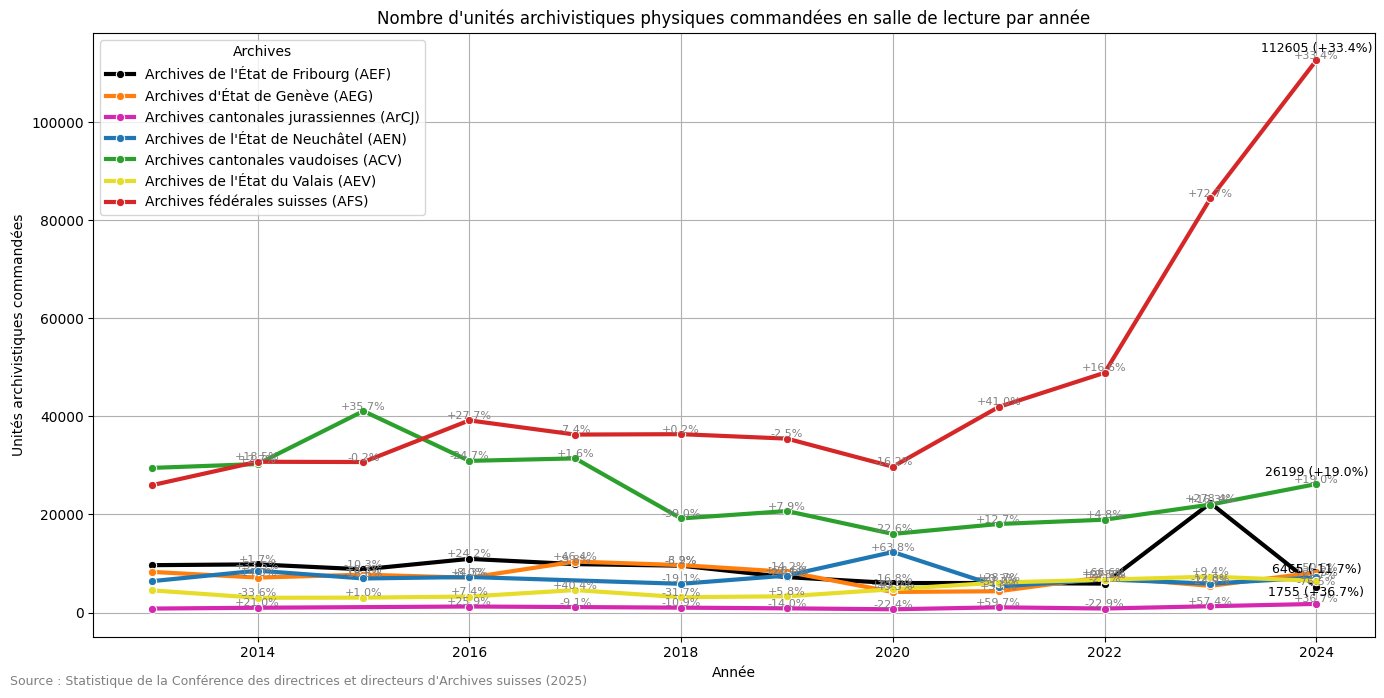

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Charger les données
df = pd.read_excel("statistiques_archives_suisses.xlsx")
df_clean = df[['archives', 'Date', "Nombre d'unités archivistiques commandées"]].copy()
df_clean.columns = ['Archives', 'Année', 'Unités_archivistiques_commandées']

# 2. Conversion des types
df_clean['Année'] = pd.to_numeric(df_clean['Année'], errors='coerce')
df_clean['Unités_archivistiques_commandées'] = pd.to_numeric(df_clean['Unités_archivistiques_commandées'], errors='coerce')

# 3. Grille complète Année × Archives
archives_uniques = df_clean['Archives'].dropna().unique()
annees = range(int(df_clean['Année'].min()), int(df_clean['Année'].max()) + 1)
grille = pd.MultiIndex.from_product([annees, archives_uniques], names=['Année', 'Archives']).to_frame(index=False)
df_complet = pd.merge(grille, df_clean, on=['Année', 'Archives'], how='left')

# 4. Calcul de la variation en %
df_complet['Variation_%'] = (
    df_complet
    .sort_values(['Archives', 'Année'])
    .groupby('Archives')['Unités_archivistiques_commandées']
    .pct_change() * 100
).round(1)

# 5. Palette personnalisée
palette_custom_base = {
    "Archives d'État de Genève (AEG)": '#ff7f0e',
    "Archives cantonales vaudoises (ACV)": '#2ca02c',
    "Archives de l'état de Neuchatel": "#b6f550",
    "Archives cantonales jurassiennes (ArCJ)": "#d627b0",
    "Archives de l'État de Fribourg (AEF)": "#000000",
    "Archives de l'État du Valais (AEV)": "#e6dd2b",
    "Archives fédérales suisses (AFS)": '#d62728',
}
remaining_archives = [a for a in archives_uniques if a not in palette_custom_base]
auto_palette = sns.color_palette("tab20", len(remaining_archives))
palette_custom = palette_custom_base.copy()
palette_custom.update(dict(zip(remaining_archives, auto_palette)))

# 6. Visualisation
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_complet,
    x='Année',
    y='Unités_archivistiques_commandées',
    hue='Archives',
    palette=palette_custom,
    marker='o',
    linewidth=3.0
)

# 7. Ajouter les variations % à chaque point
for _, row in df_complet.dropna(subset=['Unités_archivistiques_commandées', 'Variation_%']).iterrows():
    variation = row['Variation_%']
    signe = '+' if variation > 0 else ''
    plt.text(row['Année'], row['Unités_archivistiques_commandées'] + 300,
             f"{signe}{variation}%", fontsize=8, color='gray', ha='center')

# 8. Étiquettes sur derniers points
min_vertical_distance = 2000
used_y = []
last_points = (
    df_complet
    .sort_values('Année')
    .dropna(subset=['Unités_archivistiques_commandées'])
    .groupby('Archives')
    .tail(1)
)

for _, row in last_points.iterrows():
    y_val = row['Unités_archivistiques_commandées']
    variation = row['Variation_%']
    signe = '+' if variation > 0 else ''
    if all(abs(y_val - used) > min_vertical_distance for used in used_y):
        plt.text(row['Année'], y_val + 1000, f"{int(y_val)} ({signe}{variation}%)",
                 ha='center', va='bottom', fontsize=9, color='black')
        used_y.append(y_val)

# 9. Mise en forme
plt.title("Nombre d'unités archivistiques physiques commandées en salle de lecture par année")
plt.xlabel("Année")
plt.ylabel("Unités archivistiques commandées")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Archives", loc='upper left')

# 10. Source
plt.figtext(
    0.01, 0.01,
    "Source : Statistique de la Conférence des directrices et directeurs d'Archives suisses (2025)",
    fontsize=9,
    ha='left',
    va='bottom',
    color='gray'
)

plt.show()



In [3]:
!pip install adjustText

C:\Users\rroll\AppData\Local\Temp\ipykernel_29380\1389540029.py:26: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  .pct_change() * 100


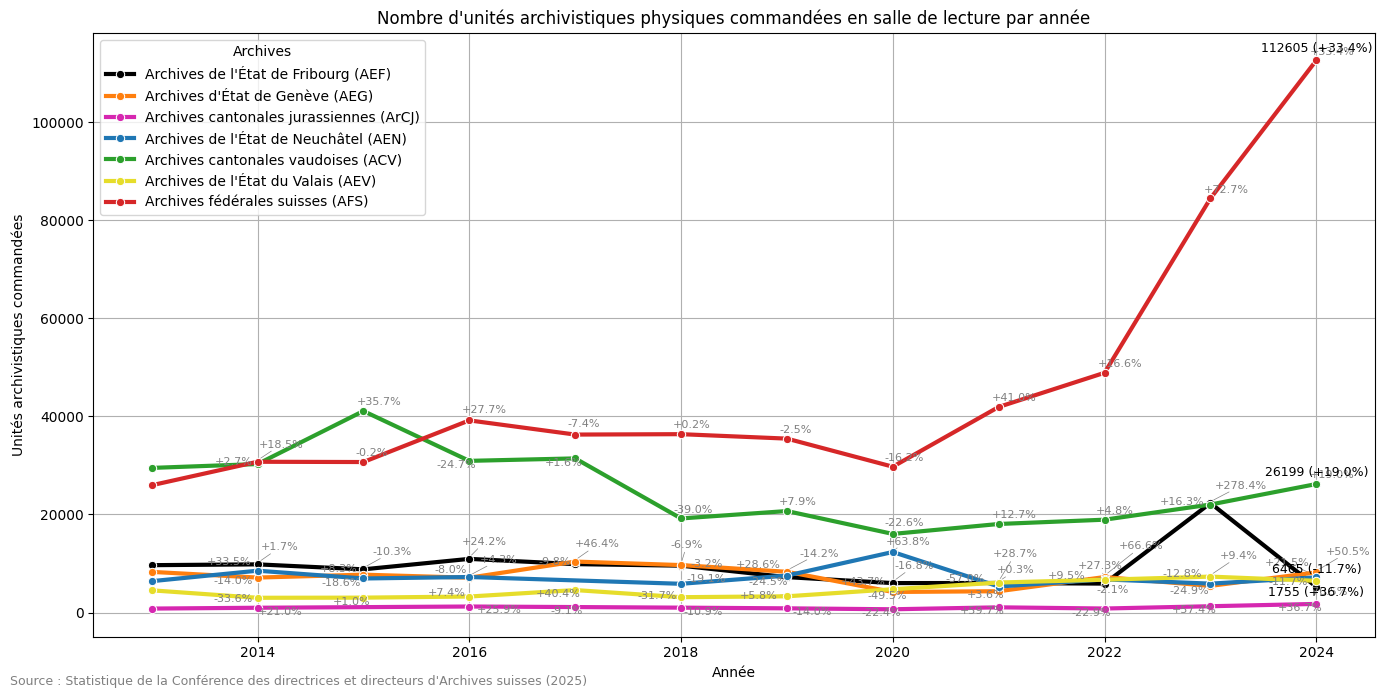

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# 1. Charger les données
df = pd.read_excel("statistiques_archives_suisses.xlsx")
df_clean = df[['archives', 'Date', "Nombre d'unités archivistiques commandées"]].copy()
df_clean.columns = ['Archives', 'Année', 'Unités_archivistiques_commandées']

# 2. Conversion des types
df_clean['Année'] = pd.to_numeric(df_clean['Année'], errors='coerce')
df_clean['Unités_archivistiques_commandées'] = pd.to_numeric(df_clean['Unités_archivistiques_commandées'], errors='coerce')

# 3. Grille complète Année × Archives
archives_uniques = df_clean['Archives'].dropna().unique()
annees = range(int(df_clean['Année'].min()), int(df_clean['Année'].max()) + 1)
grille = pd.MultiIndex.from_product([annees, archives_uniques], names=['Année', 'Archives']).to_frame(index=False)
df_complet = pd.merge(grille, df_clean, on=['Année', 'Archives'], how='left')

# 4. Calcul de la variation en %
df_complet['Variation_%'] = (
    df_complet
    .sort_values(['Archives', 'Année'])
    .groupby('Archives')['Unités_archivistiques_commandées']
    .pct_change() * 100
).round(1)

# 5. Palette personnalisée
palette_custom_base = {
    "Archives d'État de Genève (AEG)": '#ff7f0e',
    "Archives cantonales vaudoises (ACV)": '#2ca02c',
    "Archives de l'état de Neuchatel": "#b6f550",
    "Archives cantonales jurassiennes (ArCJ)": "#d627b0",
    "Archives de l'État de Fribourg (AEF)": "#000000",
    "Archives de l'État du Valais (AEV)": "#e6dd2b",
    "Archives fédérales suisses (AFS)": '#d62728',
}
remaining_archives = [a for a in archives_uniques if a not in palette_custom_base]
auto_palette = sns.color_palette("tab20", len(remaining_archives))
palette_custom = palette_custom_base.copy()
palette_custom.update(dict(zip(remaining_archives, auto_palette)))

# 6. Visualisation
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_complet,
    x='Année',
    y='Unités_archivistiques_commandées',
    hue='Archives',
    palette=palette_custom,
    marker='o',
    linewidth=3.0
)

# 7. Ajouter les variations % à chaque point avec ajustement automatique
texts = []
for _, row in df_complet.dropna(subset=['Unités_archivistiques_commandées', 'Variation_%']).iterrows():
    variation = row['Variation_%']
    signe = '+' if variation > 0 else ''
    txt = plt.text(
        row['Année'],
        row['Unités_archivistiques_commandées'] + 300,
        f"{signe}{variation}%",
        fontsize=8,
        color='gray',
        ha='center'
    )
    texts.append(txt)

# 8. Appliquer adjustText pour éviter les collisions
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

# 9. Étiquettes sur les derniers points avec valeur + variation %
min_vertical_distance = 2000
used_y = []

last_points = (
    df_complet
    .sort_values('Année')
    .dropna(subset=['Unités_archivistiques_commandées'])
    .groupby('Archives')
    .tail(1)
)

for _, row in last_points.iterrows():
    y_val = row['Unités_archivistiques_commandées']
    variation = row['Variation_%']
    signe = '+' if variation > 0 else ''
    if all(abs(y_val - used) > min_vertical_distance for used in used_y):
        plt.text(row['Année'], y_val + 1000, f"{int(y_val)} ({signe}{variation}%)",
                 ha='center', va='bottom', fontsize=9, color='black')
        used_y.append(y_val)

# 10. Mise en forme
plt.title("Nombre d'unités archivistiques physiques commandées en salle de lecture par année")
plt.xlabel("Année")
plt.ylabel("Unités archivistiques commandées")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Archives", loc='upper left')

# 11. Source
plt.figtext(
    0.01, 0.01,
    "Source : Statistique de la Conférence des directrices et directeurs d'Archives suisses (2025)",
    fontsize=9,
    ha='left',
    va='bottom',
    color='gray'
)

plt.show()


C:\Users\rroll\AppData\Local\Temp\ipykernel_29380\3898874192.py:26: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  .pct_change() * 100


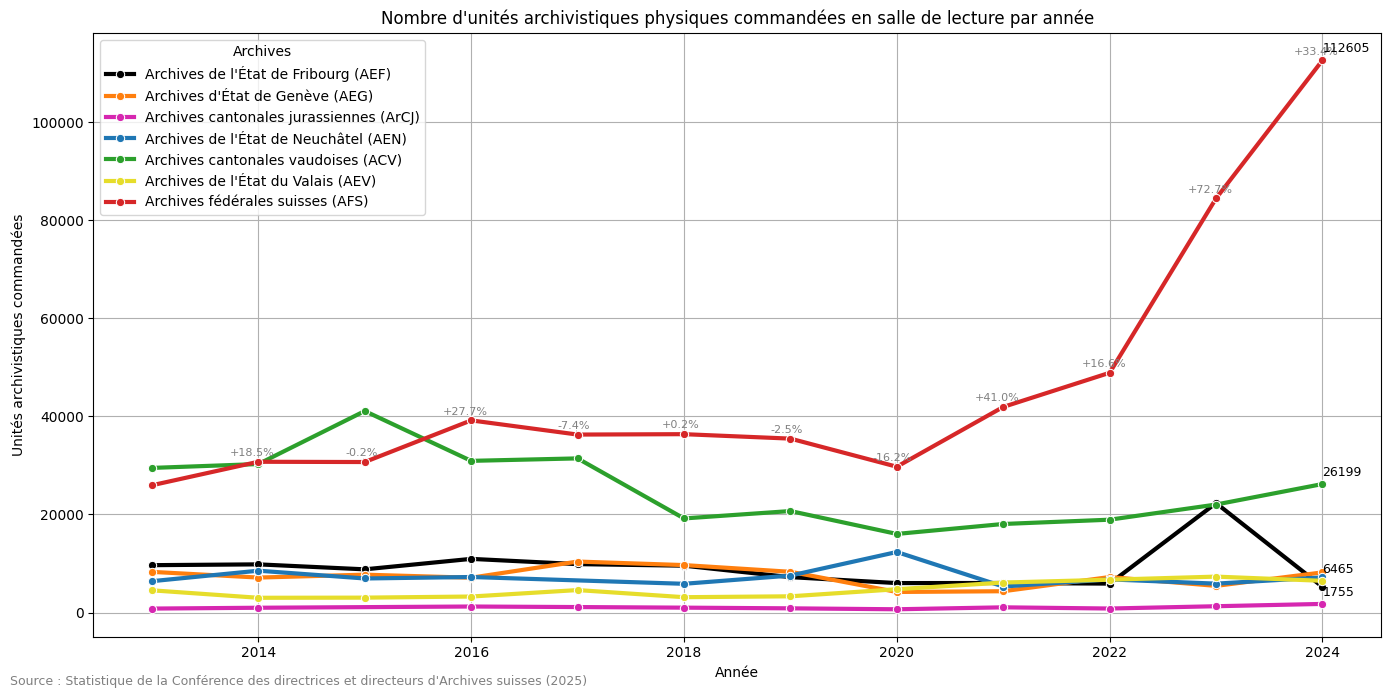

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# 1. Charger les données
df = pd.read_excel("statistiques_archives_suisses.xlsx")
df_clean = df[['archives', 'Date', "Nombre d'unités archivistiques commandées"]].copy()
df_clean.columns = ['Archives', 'Année', 'Unités_archivistiques_commandées']

# 2. Conversion des types
df_clean['Année'] = pd.to_numeric(df_clean['Année'], errors='coerce')
df_clean['Unités_archivistiques_commandées'] = pd.to_numeric(df_clean['Unités_archivistiques_commandées'], errors='coerce')

# 3. Grille complète Année × Archives
archives_uniques = df_clean['Archives'].dropna().unique()
annees = range(int(df_clean['Année'].min()), int(df_clean['Année'].max()) + 1)
grille = pd.MultiIndex.from_product([annees, archives_uniques], names=['Année', 'Archives']).to_frame(index=False)
df_complet = pd.merge(grille, df_clean, on=['Année', 'Archives'], how='left')

# 4. Calcul de la variation en %
df_complet['Variation_%'] = (
    df_complet
    .sort_values(['Archives', 'Année'])
    .groupby('Archives')['Unités_archivistiques_commandées']
    .pct_change() * 100
).round(1)

# 5. Palette personnalisée
palette_custom_base = {
    "Archives d'État de Genève (AEG)": '#ff7f0e',
    "Archives cantonales vaudoises (ACV)": '#2ca02c',
    "Archives de l'état de Neuchatel": "#b6f550",
    "Archives cantonales jurassiennes (ArCJ)": "#d627b0",
    "Archives de l'État de Fribourg (AEF)": "#000000",
    "Archives de l'État du Valais (AEV)": "#e6dd2b",
    "Archives fédérales suisses (AFS)": '#d62728',
}
remaining_archives = [a for a in archives_uniques if a not in palette_custom_base]
auto_palette = sns.color_palette("tab20", len(remaining_archives))
palette_custom = palette_custom_base.copy()
palette_custom.update(dict(zip(remaining_archives, auto_palette)))

# 6. Visualisation
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_complet,
    x='Année',
    y='Unités_archivistiques_commandées',
    hue='Archives',
    palette=palette_custom,
    marker='o',
    linewidth=3.0
)

# 7. Ajouter les variations % uniquement pour les AFS
texts = []
for _, row in df_complet[
    (df_complet['Archives'] == 'Archives fédérales suisses (AFS)') &
    df_complet['Unités_archivistiques_commandées'].notna() &
    df_complet['Variation_%'].notna()
].iterrows():
    variation = row['Variation_%']
    signe = '+' if variation > 0 else ''
    txt = plt.text(
        row['Année'],
        row['Unités_archivistiques_commandées'] + 300,
        f"{signe}{variation}%",
        fontsize=8,
        color='gray',
        ha='center'
    )
    texts.append(txt)

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

# 8. Étiquettes sur les derniers points de chaque série
min_vertical_distance = 2000
used_y = []

last_points = (
    df_complet
    .sort_values('Année')
    .dropna(subset=['Unités_archivistiques_commandées'])
    .groupby('Archives')
    .tail(1)
)

for _, row in last_points.iterrows():
    y_val = row['Unités_archivistiques_commandées']
    variation = row['Variation_%']
    signe = '+' if variation > 0 else ''
    if all(abs(y_val - used) > min_vertical_distance for used in used_y):
        plt.text(row['Année'], y_val + 1000, f"{int(y_val)}",
                 ha='left', va='bottom', fontsize=9, color='black')
        used_y.append(y_val)

# 9. Mise en forme
plt.title("Nombre d'unités archivistiques physiques commandées en salle de lecture par année")
plt.xlabel("Année")
plt.ylabel("Unités archivistiques commandées")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Archives", loc='upper left')

# 10. Source
plt.figtext(
    0.01, 0.01,
    "Source : Statistique de la Conférence des directrices et directeurs d'Archives suisses (2025)",
    fontsize=9,
    ha='left',
    va='bottom',
    color='gray'
)

plt.show()


C:\Users\rroll\AppData\Local\Temp\ipykernel_29380\305266670.py:26: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  .pct_change() * 100


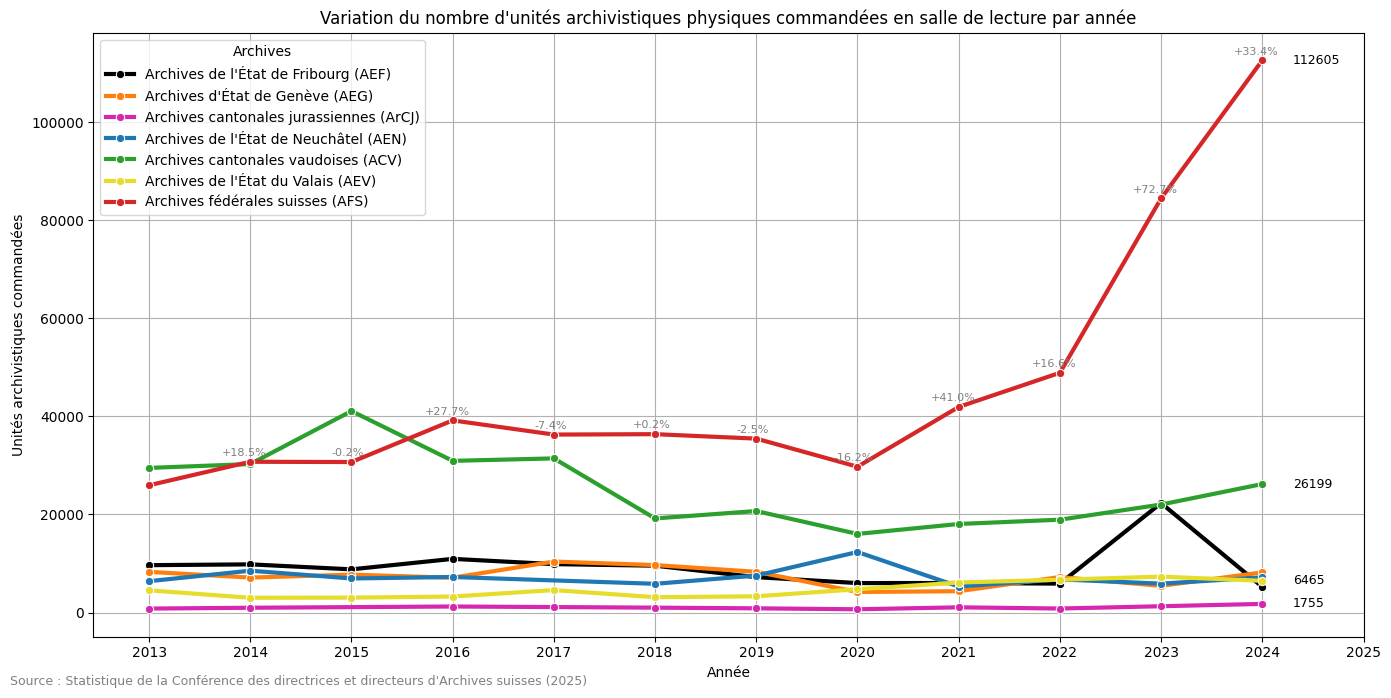

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# 1. Charger les données
df = pd.read_excel("statistiques_archives_suisses.xlsx")
df_clean = df[['archives', 'Date', "Nombre d'unités archivistiques commandées"]].copy()
df_clean.columns = ['Archives', 'Année', 'Unités_archivistiques_commandées']

# 2. Conversion des types
df_clean['Année'] = pd.to_numeric(df_clean['Année'], errors='coerce')
df_clean['Unités_archivistiques_commandées'] = pd.to_numeric(df_clean['Unités_archivistiques_commandées'], errors='coerce')

# 3. Grille complète Année × Archives
archives_uniques = df_clean['Archives'].dropna().unique()
annees = list(range(int(df_clean['Année'].min()), 2026))  # Inclure 2025
grille = pd.MultiIndex.from_product([annees, archives_uniques], names=['Année', 'Archives']).to_frame(index=False)
df_complet = pd.merge(grille, df_clean, on=['Année', 'Archives'], how='left')

# 4. Calcul de la variation en %
df_complet['Variation_%'] = (
    df_complet
    .sort_values(['Archives', 'Année'])
    .groupby('Archives')['Unités_archivistiques_commandées']
    .pct_change() * 100
).round(1)

# 5. Palette personnalisée
palette_custom_base = {
    "Archives d'État de Genève (AEG)": '#ff7f0e',
    "Archives cantonales vaudoises (ACV)": '#2ca02c',
    "Archives de l'état de Neuchatel": "#b6f550",
    "Archives cantonales jurassiennes (ArCJ)": "#d627b0",
    "Archives de l'État de Fribourg (AEF)": "#000000",
    "Archives de l'État du Valais (AEV)": "#e6dd2b",
    "Archives fédérales suisses (AFS)": '#d62728',
}
remaining_archives = [a for a in archives_uniques if a not in palette_custom_base]
auto_palette = sns.color_palette("tab20", len(remaining_archives))
palette_custom = palette_custom_base.copy()
palette_custom.update(dict(zip(remaining_archives, auto_palette)))

# 6. Visualisation
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_complet,
    x='Année',
    y='Unités_archivistiques_commandées',
    hue='Archives',
    palette=palette_custom,
    marker='o',
    linewidth=3.0
)

# 7. Affichage des variations % uniquement pour AFS
texts = []
for _, row in df_complet[
    (df_complet['Archives'] == 'Archives fédérales suisses (AFS)') &
    df_complet['Unités_archivistiques_commandées'].notna() &
    df_complet['Variation_%'].notna()
].iterrows():
    variation = row['Variation_%']
    signe = '+' if variation > 0 else ''
    txt = plt.text(
        row['Année'],
        row['Unités_archivistiques_commandées'] + 300,
        f"{signe}{variation}%",
        fontsize=8,
        color='gray',
        ha='center'
    )
    texts.append(txt)

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

# 8. Étiquettes des derniers points à droite
min_vertical_distance = 2000
used_y = []

last_points = (
    df_complet
    .dropna(subset=['Unités_archivistiques_commandées'])
    .sort_values('Année')
    .groupby('Archives')
    .tail(1)
)

for _, row in last_points.iterrows():
    x_val = row['Année']
    y_val = row['Unités_archivistiques_commandées']
    variation = row['Variation_%']
    signe = '+' if variation > 0 else ''
    if all(abs(y_val - used) > min_vertical_distance for used in used_y):
        plt.text(
            x_val + 0.3,
            y_val,
            f"{int(y_val)}",
            ha='left',
            va='center',
            fontsize=9,
            color='black'
        )
        used_y.append(y_val)

# 9. Axe X : toutes les années jusqu’à 2025
plt.xticks(ticks=list(range(int(df_complet['Année'].min()), 2026)))

# 10. Mise en forme
plt.title("Variation du nombre d'unités archivistiques physiques commandées en salle de lecture par année")
plt.xlabel("Année")
plt.ylabel("Unités archivistiques commandées")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Archives", loc='upper left')

# 11. Source
plt.figtext(
    0.01, 0.01,
    "Source : Statistique de la Conférence des directrices et directeurs d'Archives suisses (2025)",
    fontsize=9,
    ha='left',
    va='bottom',
    color='gray'
)

plt.show()


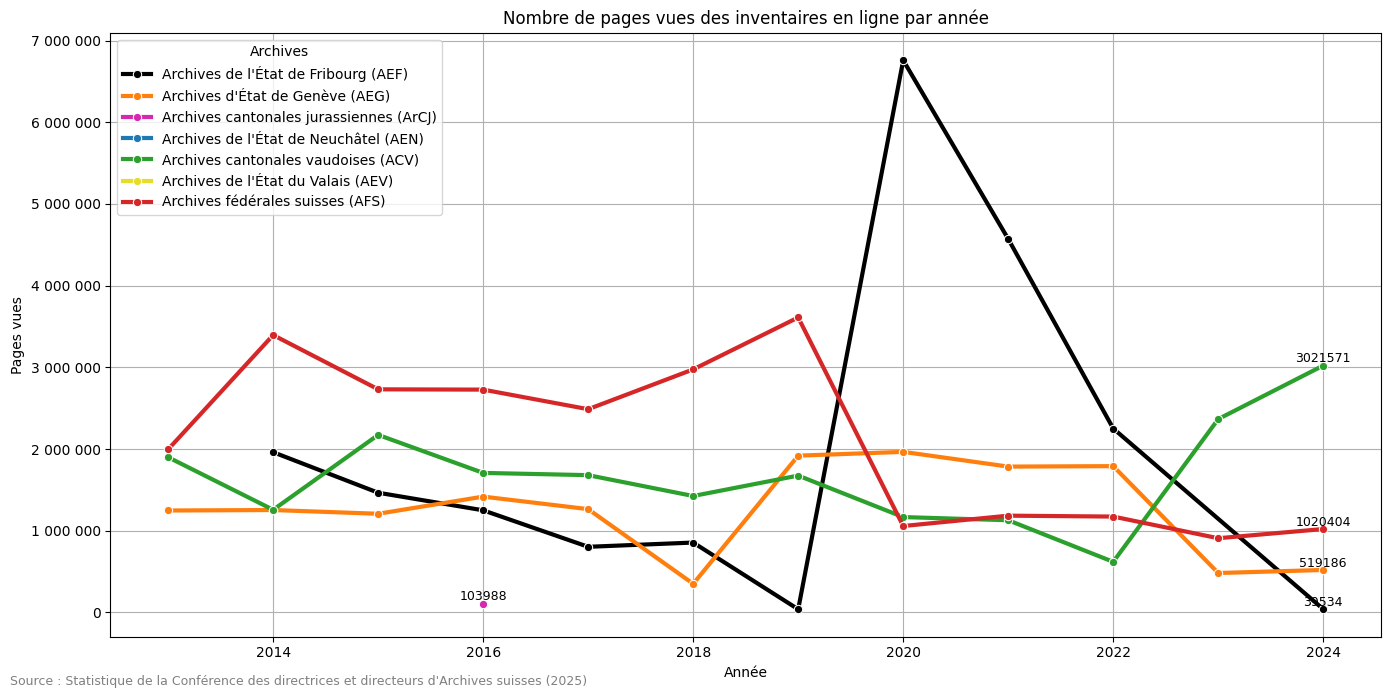

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 1. Charger les données
df = pd.read_excel("statistiques_archives_suisses.xlsx")

# 2. Extraire la colonne d’intérêt
df_clean = df[['archives', 'Date', 'Nombre de pages vues des inventaires en ligne']].copy()
df_clean.columns = ['Archives', 'Année', 'Pages_vues']

# 3. Conversion des types
df_clean['Année'] = pd.to_numeric(df_clean['Année'], errors='coerce')
df_clean['Pages_vues'] = pd.to_numeric(df_clean['Pages_vues'], errors='coerce')

# 4. Grille complète Année × Archives
archives_uniques = df_clean['Archives'].dropna().unique()
annees = range(int(df_clean['Année'].min()), int(df_clean['Année'].max()) + 1)
grille = pd.MultiIndex.from_product([annees, archives_uniques], names=['Année', 'Archives']).to_frame(index=False)
df_complet = pd.merge(grille, df_clean, on=['Année', 'Archives'], how='left')

# 5. Palette personnalisée
palette_custom_base = {
    "Archives d'État de Genève (AEG)": '#ff7f0e',
    "Archives cantonales vaudoises (ACV)": '#2ca02c',
    "Archives de l'état de Neuchatel": "#b6f550",
    "Archives cantonales jurassiennes (ArCJ)": "#d627b0",
    "Archives de l'État de Fribourg (AEF)": "#000000",
    "Archives de l'État du Valais (AEV)": "#e6dd2b",
    "Archives fédérales suisses (AFS)": '#d62728',
}
remaining_archives = [a for a in archives_uniques if a not in palette_custom_base]
auto_palette = sns.color_palette("tab20", len(remaining_archives))
palette_custom = palette_custom_base.copy()
palette_custom.update(dict(zip(remaining_archives, auto_palette)))

# 6. Visualisation
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_complet,
    x='Année',
    y='Pages_vues',
    hue='Archives',
    palette=palette_custom,
    marker='o',
    linewidth=3.0
)


# Format Y en milliers (choisis une option)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' '))) 



# 7. Étiquettes sur les derniers points (sans superposition)
min_vertical_distance = 20000
used_y = []

last_points = (
    df_complet
    .sort_values('Année')
    .dropna(subset=['Pages_vues'])
    .groupby('Archives')
    .tail(1)
)

for _, row in last_points.iterrows():
    y_val = row['Pages_vues']
    if all(abs(y_val - used) > min_vertical_distance for used in used_y):
        plt.text(row['Année'], y_val + 5000, f"{int(y_val)}",
                 ha='center', va='bottom', fontsize=9, color='black')
        used_y.append(y_val)

# 8. Mise en forme
plt.title("Nombre de pages vues des inventaires en ligne par année")
plt.xlabel("Année")
plt.ylabel("Pages vues")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Archives", loc='upper left')

# 9. Source en bas à gauche
plt.figtext(
    0.01, 0.01,
    "Source : Statistique de la Conférence des directrices et directeurs d'Archives suisses (2025)",
    fontsize=9,
    ha='left',
    va='bottom',
    color='gray'
)

plt.show()


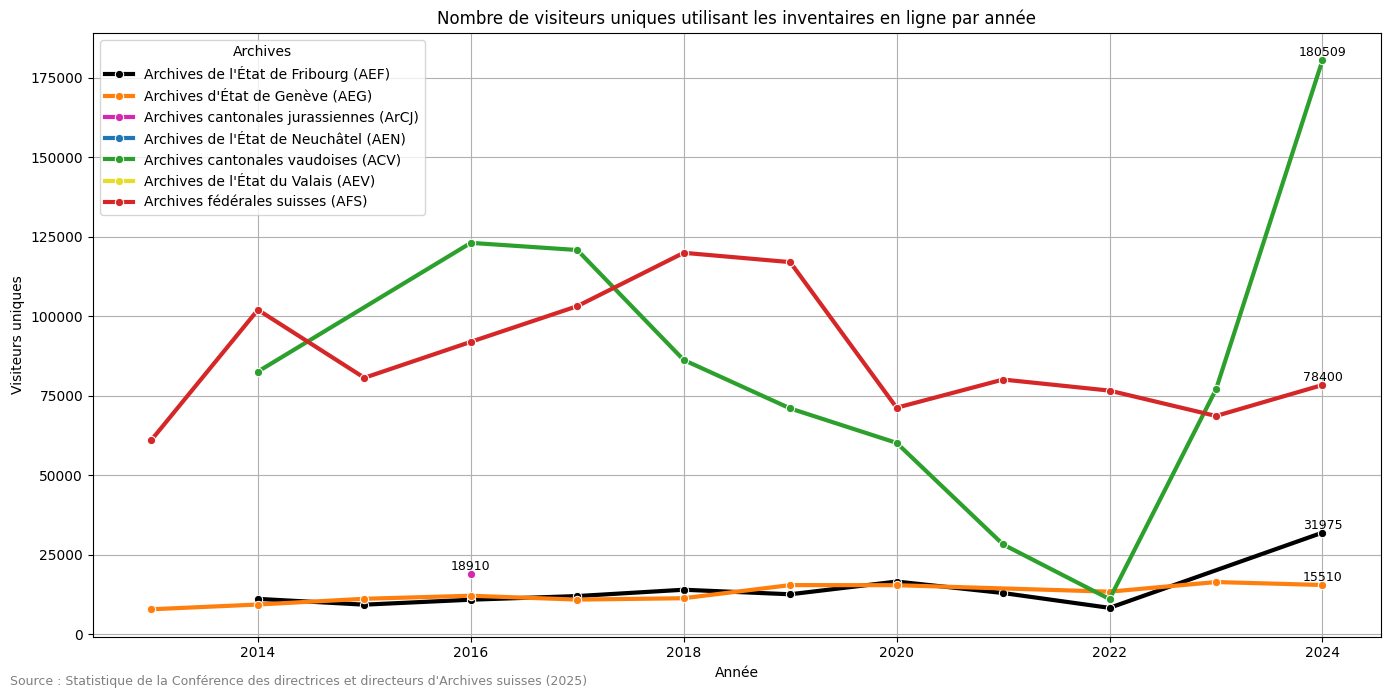

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Charger les données
df = pd.read_excel("statistiques_archives_suisses.xlsx")

# 2. Extraire la colonne d’intérêt
df_clean = df[['archives', 'Date', 'Nombre de visiteurs uniques utilisant les inventaires en ligne']].copy()
df_clean.columns = ['Archives', 'Année', 'Visiteurs_inventaires']

# 3. Conversion des types
df_clean['Année'] = pd.to_numeric(df_clean['Année'], errors='coerce')
df_clean['Visiteurs_inventaires'] = pd.to_numeric(df_clean['Visiteurs_inventaires'], errors='coerce')

# 4. Grille complète Année × Archives
archives_uniques = df_clean['Archives'].dropna().unique()
annees = range(int(df_clean['Année'].min()), int(df_clean['Année'].max()) + 1)
grille = pd.MultiIndex.from_product([annees, archives_uniques], names=['Année', 'Archives']).to_frame(index=False)
df_complet = pd.merge(grille, df_clean, on=['Année', 'Archives'], how='left')

# 5. Palette personnalisée
palette_custom_base = {
    "Archives d'État de Genève (AEG)": '#ff7f0e',
    "Archives cantonales vaudoises (ACV)": '#2ca02c',
    "Archives de l'état de Neuchatel": "#b6f550",
    "Archives cantonales jurassiennes (ArCJ)": "#d627b0",
    "Archives de l'État de Fribourg (AEF)": "#000000",
    "Archives de l'État du Valais (AEV)": "#e6dd2b",
    "Archives fédérales suisses (AFS)": '#d62728',
}
remaining_archives = [a for a in archives_uniques if a not in palette_custom_base]
auto_palette = sns.color_palette("tab20", len(remaining_archives))
palette_custom = palette_custom_base.copy()
palette_custom.update(dict(zip(remaining_archives, auto_palette)))

# 6. Visualisation
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_complet,
    x='Année',
    y='Visiteurs_inventaires',
    hue='Archives',
    palette=palette_custom,
    marker='o',
    linewidth=3.0
)

# 7. Étiquettes sur les derniers points (sans superposition)
min_vertical_distance = 1000
used_y = []

last_points = (
    df_complet
    .sort_values('Année')
    .dropna(subset=['Visiteurs_inventaires'])
    .groupby('Archives')
    .tail(1)
)

for _, row in last_points.iterrows():
    y_val = row['Visiteurs_inventaires']
    if all(abs(y_val - used) > min_vertical_distance for used in used_y):
        plt.text(row['Année'], y_val + 300, f"{int(y_val)}",
                 ha='center', va='bottom', fontsize=9, color='black')
        used_y.append(y_val)

# 8. Mise en forme
plt.title("Nombre de visiteurs uniques utilisant les inventaires en ligne par année")
plt.xlabel("Année")
plt.ylabel("Visiteurs uniques")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Archives", loc='upper left')

# 9. Source en bas à gauche
plt.figtext(
    0.01, 0.01,
    "Source : Statistique de la Conférence des directrices et directeurs d'Archives suisses (2025)",
    fontsize=9,
    ha='left',
    va='bottom',
    color='gray'
)

plt.show()


C:\Users\rroll\AppData\Local\Temp\ipykernel_29876\2566727918.py:25: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  .pct_change() * 100


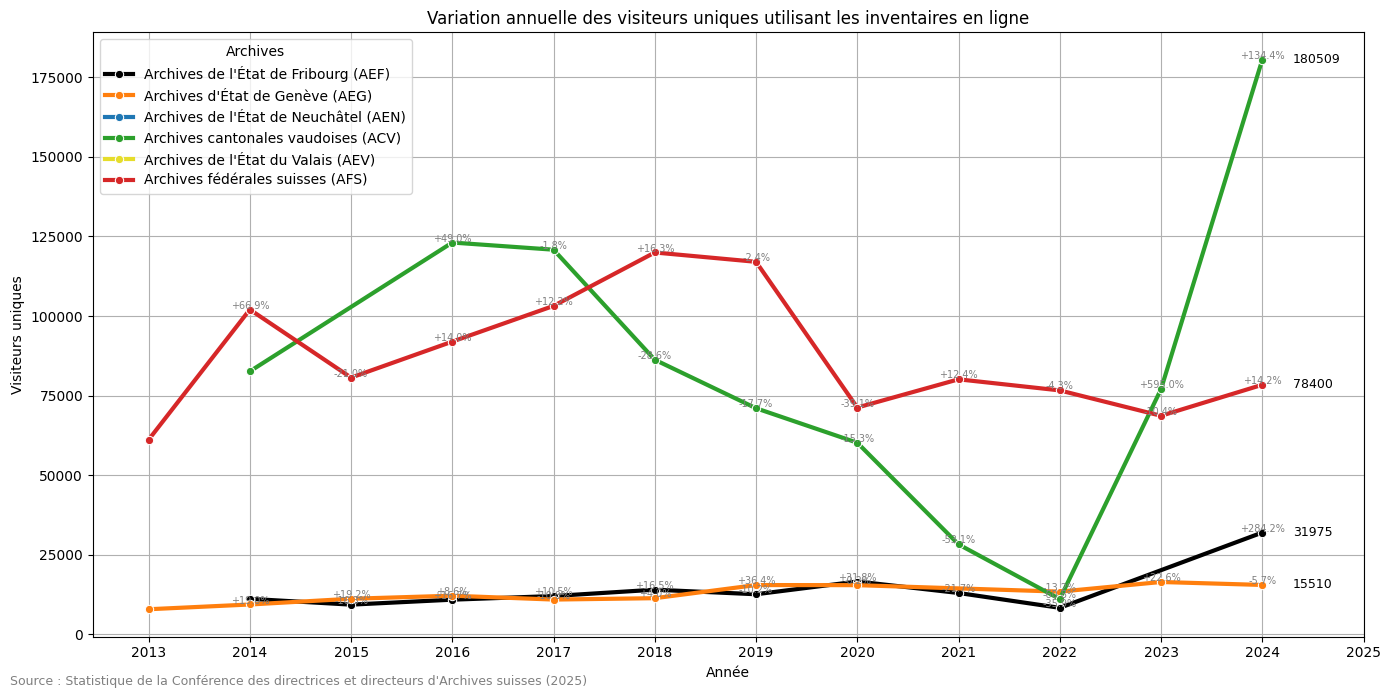

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Charger les données
df = pd.read_excel("statistiques_archives_suisses.xlsx")

# 2. Extraire et renommer les colonnes
df_clean = df[['archives', 'Date', 'Nombre de visiteurs uniques utilisant les inventaires en ligne']].copy()
df_clean.columns = ['Archives', 'Année', 'Visiteurs_inventaires']
df_clean['Année'] = pd.to_numeric(df_clean['Année'], errors='coerce')
df_clean['Visiteurs_inventaires'] = pd.to_numeric(df_clean['Visiteurs_inventaires'], errors='coerce')

# 3. Étendre les années jusqu'en 2025
archives_uniques = df_clean['Archives'].dropna().unique()
annees = list(range(int(df_clean['Année'].min()), 2026))  # Jusqu'à 2025 inclus
grille = pd.MultiIndex.from_product([annees, archives_uniques], names=['Année', 'Archives']).to_frame(index=False)
df_complet = pd.merge(grille, df_clean, on=['Année', 'Archives'], how='left')

# 4. Calcul de la variation en pourcentage
df_complet['Variation_%'] = (
    df_complet
    .sort_values(['Archives', 'Année'])
    .groupby('Archives')['Visiteurs_inventaires']
    .pct_change() * 100
).round(1)

# 5. Palette personnalisée
palette_custom_base = {
    "Archives d'État de Genève (AEG)": '#ff7f0e',
    "Archives cantonales vaudoises (ACV)": '#2ca02c',
    "Archives de l'état de Neuchatel": "#b6f550",
    "Archives de l'État de Fribourg (AEF)": "#000000",
    "Archives de l'État du Valais (AEV)": "#e6dd2b",
    "Archives fédérales suisses (AFS)": '#d62728',
}
archives_filtrées = [a for a in archives_uniques if a != "Archives cantonales jurassiennes (ArCJ)"]
remaining_archives = [a for a in archives_filtrées if a not in palette_custom_base]
auto_palette = sns.color_palette("tab20", len(remaining_archives))
palette_custom = palette_custom_base.copy()
palette_custom.update(dict(zip(remaining_archives, auto_palette)))

# 6. Filtrer pour exclure les Archives cantonales jurassiennes (ArCJ)
df_complet_filtré = df_complet[df_complet['Archives'] != "Archives cantonales jurassiennes (ArCJ)"]

# 7. Création de la figure
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_complet_filtré,
    x='Année',
    y='Visiteurs_inventaires',
    hue='Archives',
    palette=palette_custom,
    marker='o',
    linewidth=3.0
)

# 8. Affichage de la variation % à chaque point
for _, row in df_complet_filtré.dropna(subset=['Visiteurs_inventaires', 'Variation_%']).iterrows():
    variation = row['Variation_%']
    signe = '+' if variation > 0 else ''
    plt.text(
        row['Année'],
        row['Visiteurs_inventaires'] + 300,
        f"{signe}{variation}%",
        fontsize=7,
        color='gray',
        ha='center'
    )

# 9. Affichage de la valeur absolue sur le dernier point (2024), à droite
last_points = (
    df_complet_filtré
    .dropna(subset=['Visiteurs_inventaires'])
    .sort_values('Année')
    .groupby('Archives')
    .tail(1)
)

min_vertical_distance = 1000
used_y = []

for _, row in last_points.iterrows():
    y_val = row['Visiteurs_inventaires']
    if all(abs(y_val - used) > min_vertical_distance for used in used_y):
        plt.text(
            row['Année'] + 0.3,
            y_val,
            f"{int(y_val)}",
            ha='left',
            va='center',
            fontsize=9,
            color='black'
        )
        used_y.append(y_val)

# 10. Axe X de 2005 à 2025
plt.xticks(ticks=list(range(int(df_complet['Année'].min()), 2026)))

# 11. Mise en forme
plt.title("Variation annuelle des visiteurs uniques utilisant les inventaires en ligne")
plt.xlabel("Année")
plt.ylabel("Visiteurs uniques")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Archives", loc='upper left')

# 12. Source
plt.figtext(
    0.01, 0.01,
    "Source : Statistique de la Conférence des directrices et directeurs d'Archives suisses (2025)",
    fontsize=9,
    ha='left',
    va='bottom',
    color='gray'
)

plt.show()


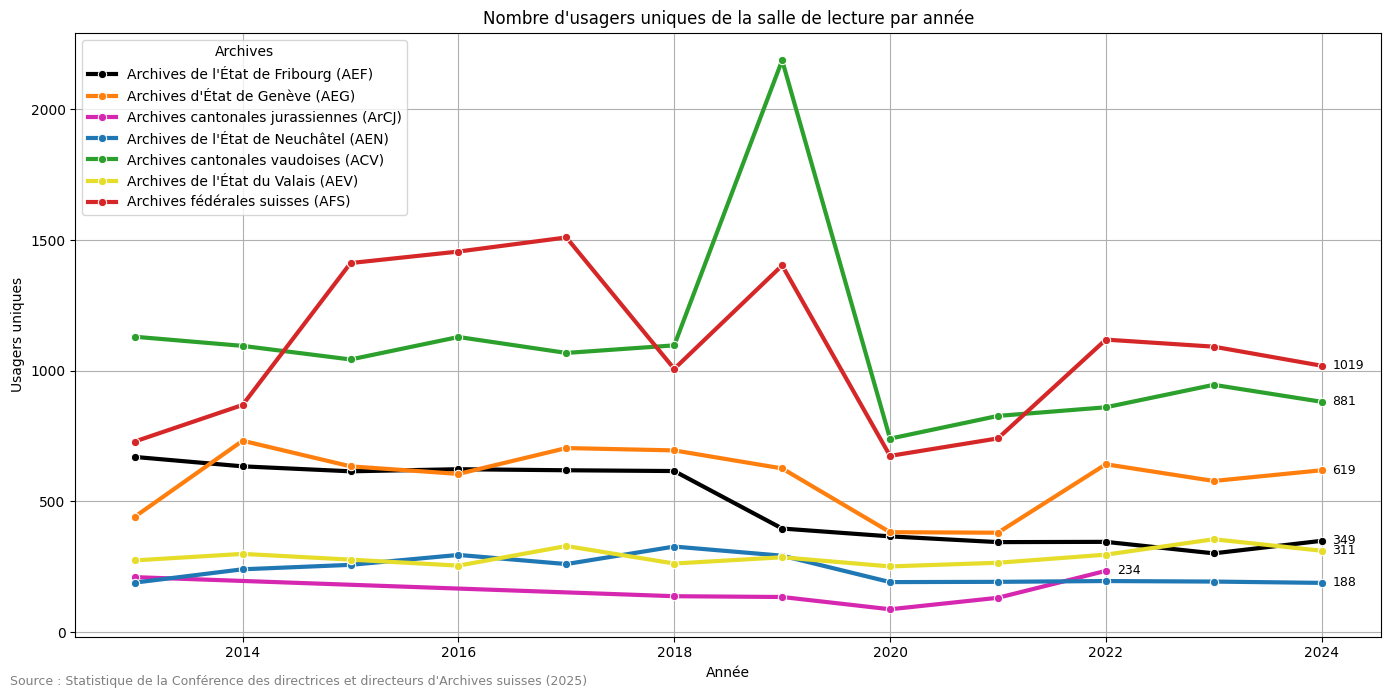

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Charger les données Excel
df = pd.read_excel("statistiques_archives_suisses.xlsx")

# 2. Extraire les colonnes utiles
df_clean = df[['archives', 'Date', "Nombre d'usagers uniques de la salle de lecture "]].copy()
df_clean.columns = ['Archives', 'Année', 'Usagers_salle']

# 3. Conversion des types
df_clean['Année'] = pd.to_numeric(df_clean['Année'], errors='coerce')
df_clean['Usagers_salle'] = pd.to_numeric(df_clean['Usagers_salle'], errors='coerce')

# 4. Grille complète Archives × Années pour garantir continuité des lignes
archives_uniques = df_clean['Archives'].dropna().unique()
annees = range(int(df_clean['Année'].min()), int(df_clean['Année'].max()) + 1)
grille = pd.MultiIndex.from_product([annees, archives_uniques], names=['Année', 'Archives']).to_frame(index=False)
df_complet = pd.merge(grille, df_clean, on=['Année', 'Archives'], how='left')

# 5. Palette personnalisée
palette_custom_base = {
    "Archives d'État de Genève (AEG)": '#ff7f0e',
    "Archives cantonales vaudoises (ACV)": '#2ca02c',
    "Archives de l'état de Neuchatel": "#b6f550",
    "Archives cantonales jurassiennes (ArCJ)": "#d627b0",
    "Archives de l'État de Fribourg (AEF)": "#000000",
    "Archives de l'État du Valais (AEV)": "#e6dd2b",
    "Archives fédérales suisses (AFS)": '#d62728',
}
remaining_archives = [a for a in archives_uniques if a not in palette_custom_base]
auto_palette = sns.color_palette("tab20", len(remaining_archives))
palette_custom = palette_custom_base.copy()
palette_custom.update(dict(zip(remaining_archives, auto_palette)))

# 6. Visualisation
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_complet,
    x='Année',
    y='Usagers_salle',
    hue='Archives',
    palette=palette_custom,
    marker='o',
    linewidth=3.0
)



# 7. Étiquettes sur les derniers points
min_vertical_distance = 10
used_y = []

# Dernier point non nul pour chaque archive
last_points = (
    df_complet
    .dropna(subset=['Usagers_salle'])
    .sort_values('Année')
    .groupby('Archives')
    .tail(1)
)

for _, row in last_points.iterrows():
    y_val = row['Usagers_salle']
    if all(abs(y_val - used) > min_vertical_distance for used in used_y):
        plt.text(
            row['Année'] + 0.1,  # léger décalage à droite
            y_val,
            f"{int(y_val)}",
            ha='left', va='center',
            fontsize=9, color='black'
        )
        used_y.append(y_val)


# 8. Mise en forme
plt.title("Nombre d'usagers uniques de la salle de lecture par année")
plt.xlabel("Année")
plt.ylabel("Usagers uniques")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Archives", loc='upper left')

# 9. Source en bas à gauche
plt.figtext(
    0.01, 0.01,
    "Source : Statistique de la Conférence des directrices et directeurs d'Archives suisses (2025)",
    fontsize=9,
    ha='left',
    va='bottom',
    color='gray'
)

plt.show()


C:\Users\rroll\AppData\Local\Temp\ipykernel_29876\2744399023.py:25: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  .pct_change() * 100


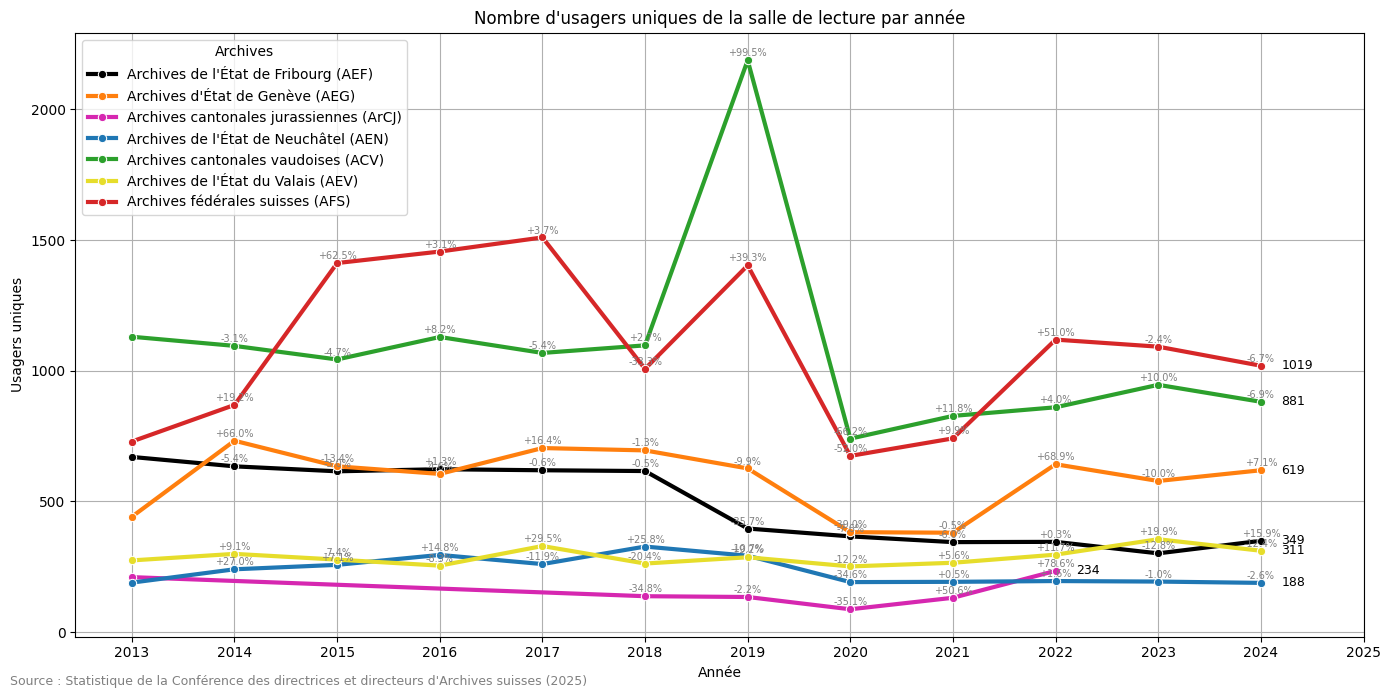

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Charger les données Excel
df = pd.read_excel("statistiques_archives_suisses.xlsx")

# 2. Extraction des colonnes pertinentes
df_clean = df[['archives', 'Date', "Nombre d'usagers uniques de la salle de lecture "]].copy()
df_clean.columns = ['Archives', 'Année', 'Usagers_salle']
df_clean['Année'] = pd.to_numeric(df_clean['Année'], errors='coerce')
df_clean['Usagers_salle'] = pd.to_numeric(df_clean['Usagers_salle'], errors='coerce')

# 3. Créer une grille complète jusqu'en 2025
archives_uniques = df_clean['Archives'].dropna().unique()
annees = list(range(int(df_clean['Année'].min()), 2026))  # Jusqu'à 2025 inclus
grille = pd.MultiIndex.from_product([annees, archives_uniques], names=['Année', 'Archives']).to_frame(index=False)
df_complet = pd.merge(grille, df_clean, on=['Année', 'Archives'], how='left')

# 4. Calcul de la variation annuelle en %
df_complet['Variation_%'] = (
    df_complet
    .sort_values(['Archives', 'Année'])
    .groupby('Archives')['Usagers_salle']
    .pct_change() * 100
).round(1)

# 5. Palette personnalisée
palette_custom_base = {
    "Archives d'État de Genève (AEG)": '#ff7f0e',
    "Archives cantonales vaudoises (ACV)": '#2ca02c',
    "Archives de l'état de Neuchatel": "#b6f550",
    "Archives cantonales jurassiennes (ArCJ)": "#d627b0",
    "Archives de l'État de Fribourg (AEF)": "#000000",
    "Archives de l'État du Valais (AEV)": "#e6dd2b",
    "Archives fédérales suisses (AFS)": '#d62728',
}
remaining_archives = [a for a in archives_uniques if a not in palette_custom_base]
auto_palette = sns.color_palette("tab20", len(remaining_archives))
palette_custom = palette_custom_base.copy()
palette_custom.update(dict(zip(remaining_archives, auto_palette)))

# 6. Visualisation
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_complet,
    x='Année',
    y='Usagers_salle',
    hue='Archives',
    palette=palette_custom,
    marker='o',
    linewidth=3.0
)

# 7. Affichage de la variation en % sur chaque point
for _, row in df_complet.dropna(subset=['Usagers_salle', 'Variation_%']).iterrows():
    variation = row['Variation_%']
    signe = '+' if variation > 0 else ''
    plt.text(
        row['Année'],
        row['Usagers_salle'] + 15,
        f"{signe}{variation}%",
        fontsize=7,
        color='gray',
        ha='center'
    )

# 8. Affichage de la valeur absolue sur le dernier point (2024), à droite
last_points = (
    df_complet
    .dropna(subset=['Usagers_salle'])
    .sort_values('Année')
    .groupby('Archives')
    .tail(1)
)

min_vertical_distance = 10
used_y = []

for _, row in last_points.iterrows():
    y_val = row['Usagers_salle']
    if all(abs(y_val - used) > min_vertical_distance for used in used_y):
        plt.text(
            row['Année'] + 0.2,
            y_val,
            f"{int(y_val)}",
            ha='left',
            va='center',
            fontsize=9,
            color='black'
        )
        used_y.append(y_val)

# 9. Axe X jusqu’à 2025
plt.xticks(ticks=list(range(int(df_complet['Année'].min()), 2026)))

# 10. Mise en forme finale
plt.title("Nombre d'usagers uniques de la salle de lecture par année")
plt.xlabel("Année")
plt.ylabel("Usagers uniques")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Archives", loc='upper left')

# 11. Source en bas à gauche
plt.figtext(
    0.01, 0.01,
    "Source : Statistique de la Conférence des directrices et directeurs d'Archives suisses (2025)",
    fontsize=9,
    ha='left',
    va='bottom',
    color='gray'
)

plt.show()


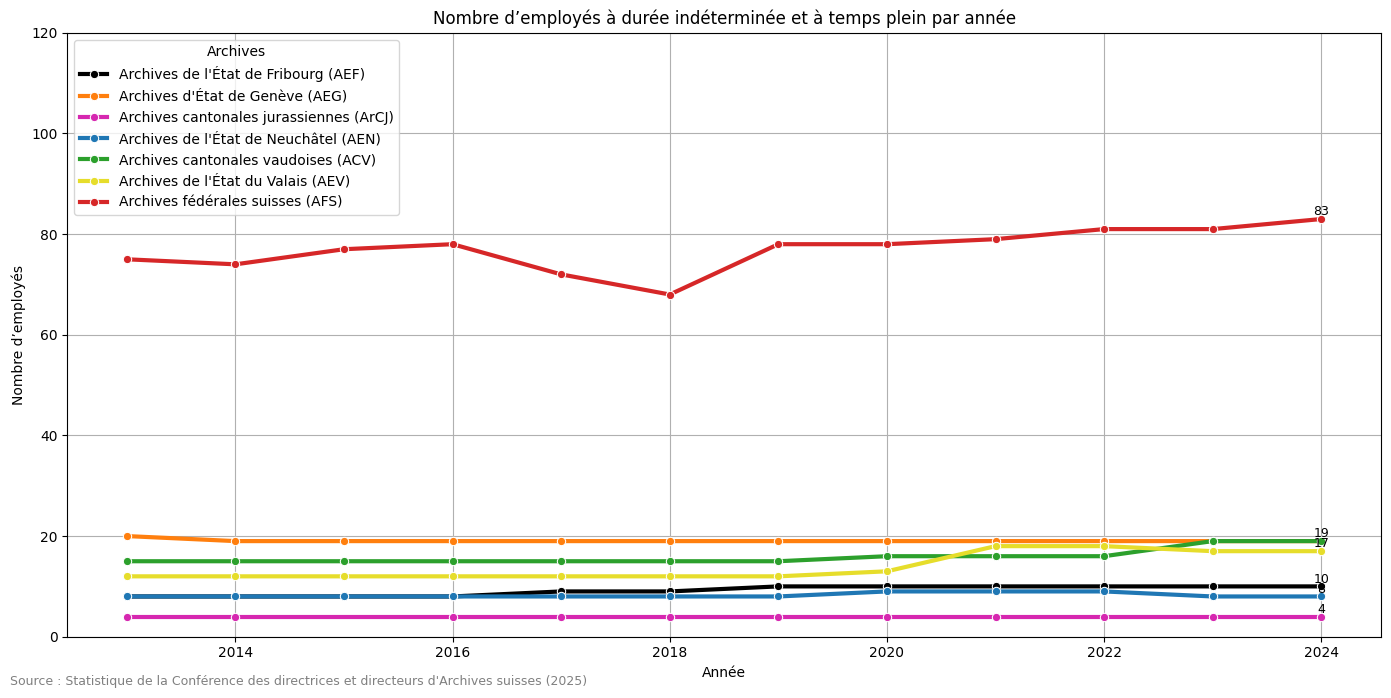

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Charger les données
df = pd.read_excel("statistiques_archives_suisses.xlsx")

# 2. Extraire les colonnes nécessaires
df_clean = df[['archives', 'Date', "Nombre d’employés à durée indéterminée et à temps plein"]].copy()
df_clean.columns = ['Archives', 'Année', 'Employés_indéterminés_PleinTemps']

# 3. Conversion des types
df_clean['Année'] = pd.to_numeric(df_clean['Année'], errors='coerce')
df_clean['Employés_indéterminés_PleinTemps'] = pd.to_numeric(df_clean['Employés_indéterminés_PleinTemps'], errors='coerce')

# 4. Grille complète Archives × Années pour lignes continues
archives_uniques = df_clean['Archives'].dropna().unique()
annees = range(int(df_clean['Année'].min()), int(df_clean['Année'].max()) + 1)
grille = pd.MultiIndex.from_product([annees, archives_uniques], names=['Année', 'Archives']).to_frame(index=False)
df_complet = pd.merge(grille, df_clean, on=['Année', 'Archives'], how='left')

# 5. Palette personnalisée
palette_custom_base = {
    "Archives d'État de Genève (AEG)": '#ff7f0e',
    "Archives cantonales vaudoises (ACV)": '#2ca02c',
    "Archives de l'état de Neuchatel": "#b6f550",
    "Archives cantonales jurassiennes (ArCJ)": "#d627b0",
    "Archives de l'État de Fribourg (AEF)": "#000000",
    "Archives de l'État du Valais (AEV)": "#e6dd2b",
    "Archives fédérales suisses (AFS)": '#d62728',
}
remaining_archives = [a for a in archives_uniques if a not in palette_custom_base]
auto_palette = sns.color_palette("tab20", len(remaining_archives))
palette_custom = palette_custom_base.copy()
palette_custom.update(dict(zip(remaining_archives, auto_palette)))

# 6. Visualisation
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_complet,
    x='Année',
    y='Employés_indéterminés_PleinTemps',
    hue='Archives',
    palette=palette_custom,
    marker='o',
    linewidth=3.0
)

plt.ylim(0, 120)  # ← Fixe l’axe Y entre 0 et 100

# 7. Étiquettes sur derniers points non superposés
min_vertical_distance = 1
used_y = []

last_points = (
    df_complet
    .sort_values('Année')
    .dropna(subset=['Employés_indéterminés_PleinTemps'])
    .groupby('Archives')
    .tail(1)
)

for _, row in last_points.iterrows():
    y_val = row['Employés_indéterminés_PleinTemps']
    if all(abs(y_val - used) > min_vertical_distance for used in used_y):
        plt.text(row['Année'], y_val + 0.15, f"{int(y_val)}",
                 ha='center', va='bottom', fontsize=9, color='black')
        used_y.append(y_val)

# 8. Mise en forme finale
plt.title("Nombre d’employés à durée indéterminée et à temps plein par année")
plt.xlabel("Année")
plt.ylabel("Nombre d’employés")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Archives", loc='upper left')

# 9. Citation de la source
plt.figtext(
    0.01, 0.01,
    "Source : Statistique de la Conférence des directrices et directeurs d'Archives suisses (2025)",
    fontsize=9,
    ha='left',
    va='bottom',
    color='gray'
)

plt.show()


C:\Users\rroll\AppData\Local\Temp\ipykernel_14704\3911320336.py:25: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  .pct_change() * 100


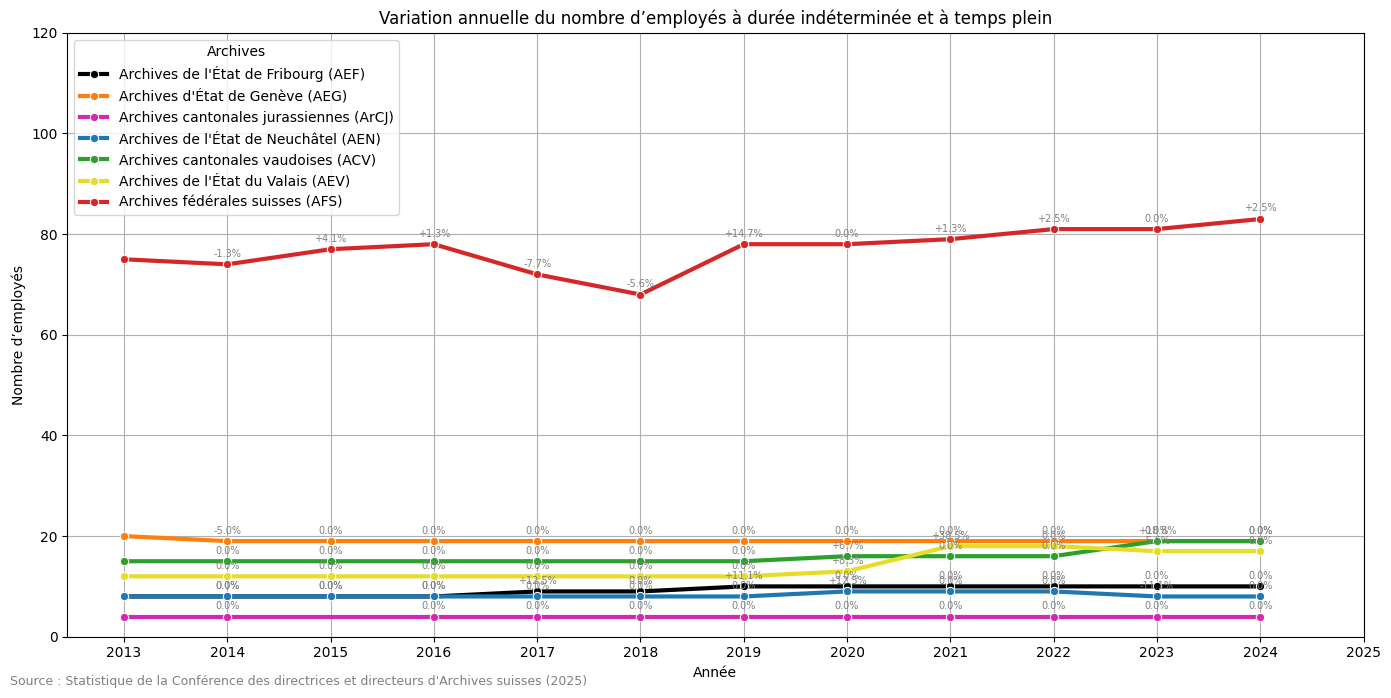

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Charger les données
df = pd.read_excel("statistiques_archives_suisses.xlsx")
df_clean = df[['archives', 'Date', "Nombre d’employés à durée indéterminée et à temps plein"]].copy()
df_clean.columns = ['Archives', 'Année', 'Employés_indéterminés_PleinTemps']

# 2. Conversion des types
df_clean['Année'] = pd.to_numeric(df_clean['Année'], errors='coerce')
df_clean['Employés_indéterminés_PleinTemps'] = pd.to_numeric(df_clean['Employés_indéterminés_PleinTemps'], errors='coerce')

# 3. Étendre les années jusqu'à 2025
archives_uniques = df_clean['Archives'].dropna().unique()
annees = list(range(int(df_clean['Année'].min()), 2026))  # ← Inclut 2025
grille = pd.MultiIndex.from_product([annees, archives_uniques], names=['Année', 'Archives']).to_frame(index=False)
df_complet = pd.merge(grille, df_clean, on=['Année', 'Archives'], how='left')

# 4. Calcul de la variation en pourcentage (%)
df_complet['Variation_%'] = (
    df_complet
    .sort_values(['Archives', 'Année'])
    .groupby('Archives')['Employés_indéterminés_PleinTemps']
    .pct_change() * 100
).round(1)

# 5. Palette de couleurs personnalisée
palette_custom_base = {
    "Archives d'État de Genève (AEG)": '#ff7f0e',
    "Archives cantonales vaudoises (ACV)": '#2ca02c',
    "Archives de l'état de Neuchatel": "#b6f550",
    "Archives cantonales jurassiennes (ArCJ)": "#d627b0",
    "Archives de l'État de Fribourg (AEF)": "#000000",
    "Archives de l'État du Valais (AEV)": "#e6dd2b",
    "Archives fédérales suisses (AFS)": '#d62728',
}
remaining_archives = [a for a in archives_uniques if a not in palette_custom_base]
auto_palette = sns.color_palette("tab20", len(remaining_archives))
palette_custom = palette_custom_base.copy()
palette_custom.update(dict(zip(remaining_archives, auto_palette)))

# 6. Visualisation avec variation par année
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_complet,
    x='Année',
    y='Employés_indéterminés_PleinTemps',
    hue='Archives',
    palette=palette_custom,
    marker='o',
    linewidth=3.0
)

plt.ylim(0, 120)

# 7. Affichage de la variation % au-dessus de chaque point
for _, row in df_complet.dropna(subset=['Employés_indéterminés_PleinTemps', 'Variation_%']).iterrows():
    variation = row['Variation_%']
    signe = '+' if variation > 0 else ''
    plt.text(
        row['Année'],
        row['Employés_indéterminés_PleinTemps'] + 1.5,  # Décalage vertical
        f"{signe}{variation}%",
        fontsize=7,
        color='gray',
        ha='center'
    )

# 8. Axe X affiché année par année jusqu’à 2025
plt.xticks(ticks=list(range(int(df_complet['Année'].min()), 2026)))

# 9. Mise en forme finale
plt.title("Variation annuelle du nombre d’employés à durée indéterminée et à temps plein")
plt.xlabel("Année")
plt.ylabel("Nombre d’employés")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Archives", loc='upper left')

# 10. Source
plt.figtext(
    0.01, 0.01,
    "Source : Statistique de la Conférence des directrices et directeurs d'Archives suisses (2025)",
    fontsize=9,
    ha='left',
    va='bottom',
    color='gray'
)

plt.show()


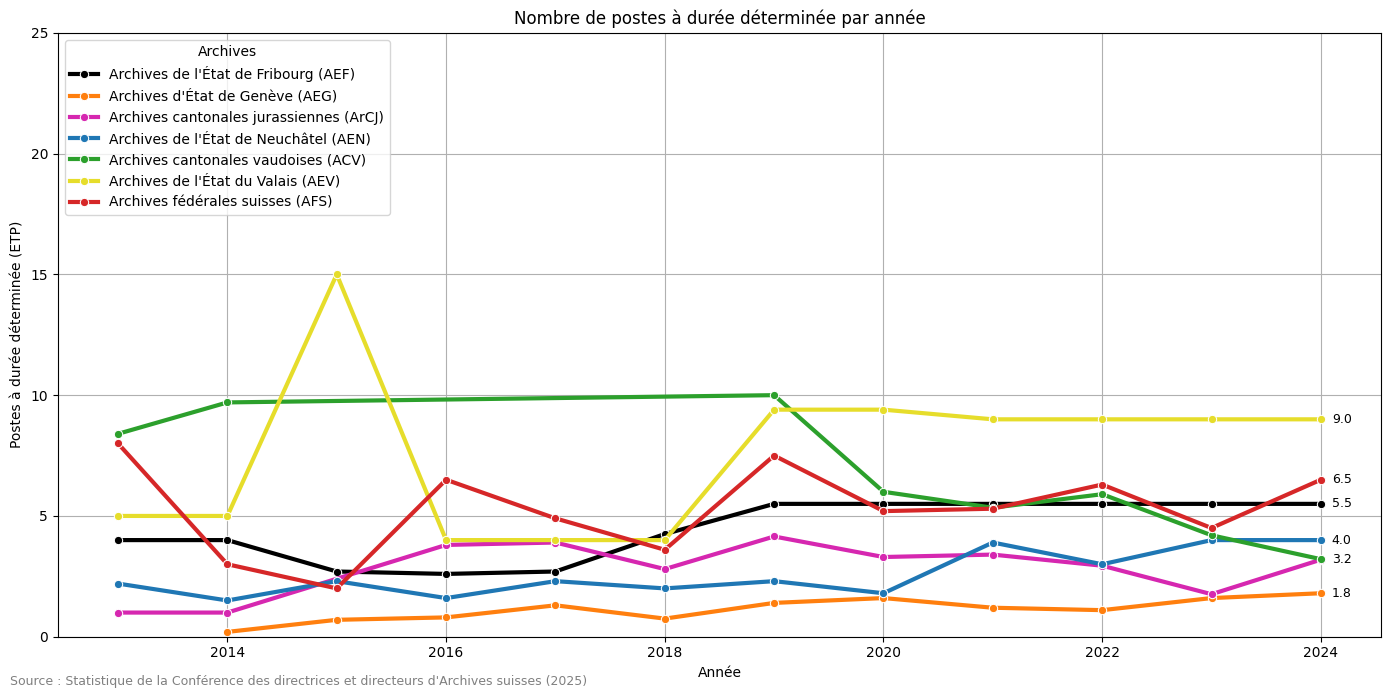

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Charger les données
df = pd.read_excel("statistiques_archives_suisses.xlsx")

# 2. Extraire les colonnes nécessaires
df_clean = df[['archives', 'Date', 'Nombre de postes à durée déterminée']].copy()
df_clean.columns = ['Archives', 'Année', 'Postes_determines']

# 3. Conversion des types
df_clean['Année'] = pd.to_numeric(df_clean['Année'], errors='coerce')
df_clean['Postes_determines'] = pd.to_numeric(df_clean['Postes_determines'], errors='coerce')

# 4. Grille complète pour lignes continues
archives_uniques = df_clean['Archives'].dropna().unique()
annees = range(int(df_clean['Année'].min()), int(df_clean['Année'].max()) + 1)
grille = pd.MultiIndex.from_product([annees, archives_uniques], names=['Année', 'Archives']).to_frame(index=False)
df_complet = pd.merge(grille, df_clean, on=['Année', 'Archives'], how='left')

# 5. Palette personnalisée
palette_custom_base = {
    "Archives d'État de Genève (AEG)": '#ff7f0e',
    "Archives cantonales vaudoises (ACV)": '#2ca02c',
    "Archives de l'état de Neuchatel": "#b6f550",
    "Archives cantonales jurassiennes (ArCJ)": "#d627b0",
    "Archives de l'État de Fribourg (AEF)": "#000000",
    "Archives de l'État du Valais (AEV)": "#e6dd2b",
    "Archives fédérales suisses (AFS)": '#d62728',
}
remaining_archives = [a for a in archives_uniques if a not in palette_custom_base]
auto_palette = sns.color_palette("tab20", len(remaining_archives))
palette_custom = palette_custom_base.copy()
palette_custom.update(dict(zip(remaining_archives, auto_palette)))

# 6. Visualisation
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_complet,
    x='Année',
    y='Postes_determines',
    hue='Archives',
    palette=palette_custom,
    marker='o',
    linewidth=3.0
)

# Fixer l’échelle Y si nécessaire (ici, raisonnable pour des effectifs)
plt.ylim(0, df_complet['Postes_determines'].max() * 1.1)

# Fixer l’échelle Y à 25
plt.ylim(0, 25)

# 7. Étiquettes sur les derniers points non superposés
min_vertical_distance = 0.5
used_y = []

last_points = (
    df_complet
    .dropna(subset=['Postes_determines'])
    .sort_values('Année')
    .groupby('Archives')
    .tail(1)
)

for _, row in last_points.iterrows():
    y_val = row['Postes_determines']
    if all(abs(y_val - used) > min_vertical_distance for used in used_y):
        plt.text(row['Année'] + 0.1, y_val, f"{round(y_val, 1)}",
                 ha='left', va='center', fontsize=9, color='black')
        used_y.append(y_val)

# 8. Mise en forme
plt.title("Nombre de postes à durée déterminée par année")
plt.xlabel("Année")
plt.ylabel("Postes à durée déterminée (ETP)")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Archives", loc='upper left')

# 9. Source en bas à gauche
plt.figtext(
    0.01, 0.01,
    "Source : Statistique de la Conférence des directrices et directeurs d'Archives suisses (2025)",
    fontsize=9,
    ha='left',
    va='bottom',
    color='gray'
)

plt.show()


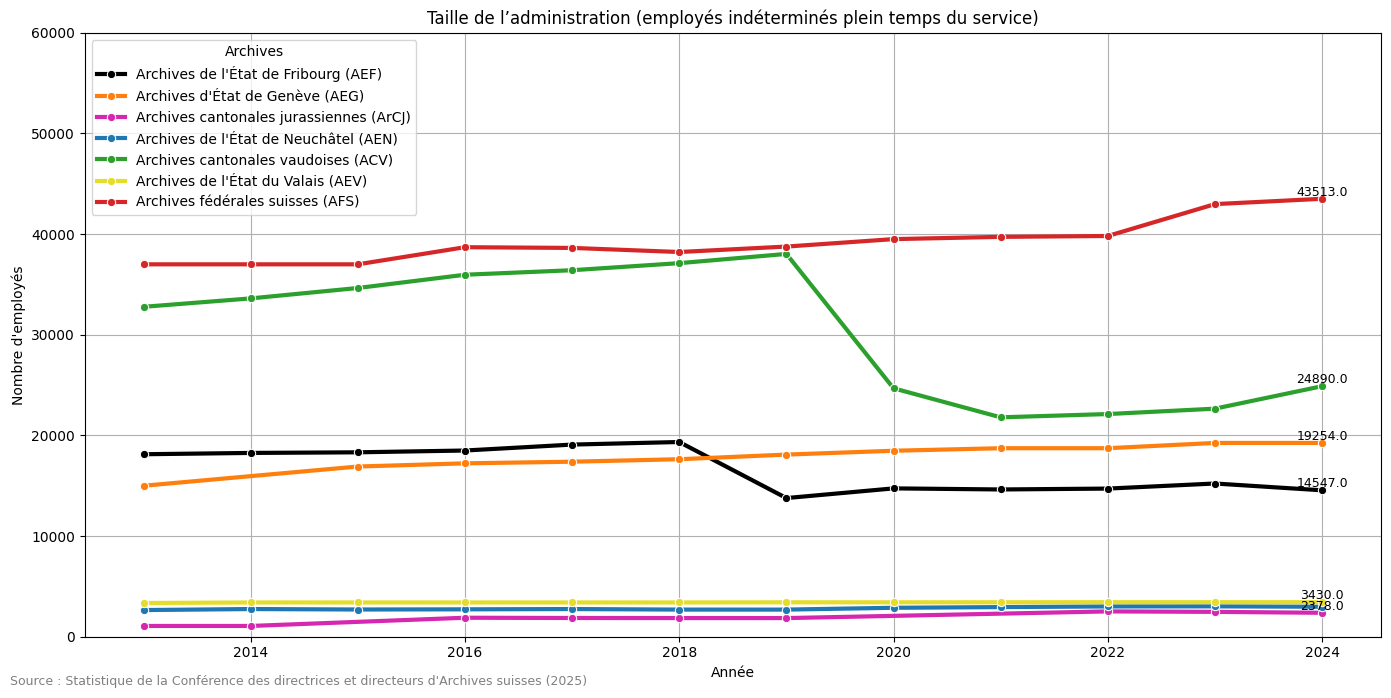

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Charger les données
df = pd.read_excel("statistiques_archives_suisses.xlsx")

# 2. Extraire les colonnes nécessaires
df_clean = df[['archives', 'Date', 'Nombre d’employés à durée indéterminée plein temps du service']].copy()
df_clean.columns = ['Archives', 'Année', 'Taille_service']

# 3. Conversion des types
df_clean['Année'] = pd.to_numeric(df_clean['Année'], errors='coerce')
df_clean['Taille_service'] = pd.to_numeric(df_clean['Taille_service'], errors='coerce')

# 4. Grille complète pour lignes continues
archives_uniques = df_clean['Archives'].dropna().unique()
annees = range(int(df_clean['Année'].min()), int(df_clean['Année'].max()) + 1)
grille = pd.MultiIndex.from_product([annees, archives_uniques], names=['Année', 'Archives']).to_frame(index=False)
df_complet = pd.merge(grille, df_clean, on=['Année', 'Archives'], how='left')

# 5. Palette personnalisée
palette_custom_base = {
    "Archives d'État de Genève (AEG)": '#ff7f0e',
    "Archives cantonales vaudoises (ACV)": '#2ca02c',
    "Archives de l'état de Neuchatel": "#b6f550",
    "Archives cantonales jurassiennes (ArCJ)": "#d627b0",
    "Archives de l'État de Fribourg (AEF)": "#000000",
    "Archives de l'État du Valais (AEV)": "#e6dd2b",
    "Archives fédérales suisses (AFS)": '#d62728',
}
remaining_archives = [a for a in archives_uniques if a not in palette_custom_base]
auto_palette = sns.color_palette("tab20", len(remaining_archives))
palette_custom = palette_custom_base.copy()
palette_custom.update(dict(zip(remaining_archives, auto_palette)))

# 6. Visualisation
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_complet,
    x='Année',
    y='Taille_service',
    hue='Archives',
    palette=palette_custom,
    marker='o',
    linewidth=3.0
)

# Fixer l’échelle Y 
plt.ylim(0, 60000)

# 7. Étiquettes sur les derniers points non superposés
min_vertical_distance = 500
used_y = []

last_points = (
    df_complet
    .sort_values('Année')
    .dropna(subset=['Taille_service'])
    .groupby('Archives')
    .tail(1)
)

for _, row in last_points.iterrows():
    y_val = row['Taille_service']
    if all(abs(y_val - used) > min_vertical_distance for used in used_y):
        plt.text(row['Année'], y_val + 0.8, f"{round(y_val, 1)}",
                 ha='center', va='bottom', fontsize=9, color='black')
        used_y.append(y_val)

# 8. Mise en forme
plt.title("Taille de l’administration (employés indéterminés plein temps du service)")
plt.xlabel("Année")
plt.ylabel("Nombre d'employés")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Archives", loc='upper left')

# 9. Source en bas à gauche
plt.figtext(
    0.01, 0.01,
    "Source : Statistique de la Conférence des directrices et directeurs d'Archives suisses (2025)",
    fontsize=9,
    ha='left',
    va='bottom',
    color='gray'
)

plt.show()


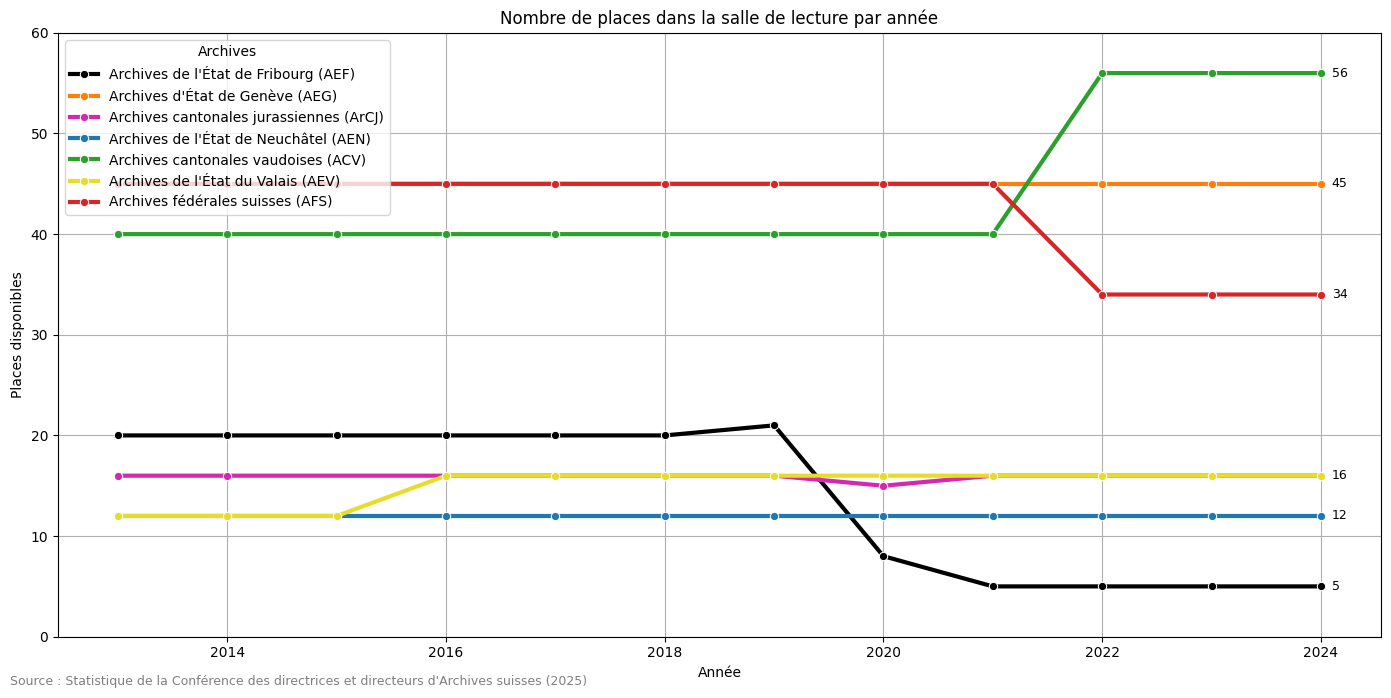

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Charger les données
df = pd.read_excel("statistiques_archives_suisses.xlsx")

# 2. Extraire les colonnes nécessaires
df_clean = df[['archives', 'Date', 'Nombre de places dans la salle de lecture']].copy()
df_clean.columns = ['Archives', 'Année', 'Places_salle']

# 3. Conversion des types
df_clean['Année'] = pd.to_numeric(df_clean['Année'], errors='coerce')
df_clean['Places_salle'] = pd.to_numeric(df_clean['Places_salle'], errors='coerce')

# 4. Grille complète pour lignes continues
archives_uniques = df_clean['Archives'].dropna().unique()
annees = range(int(df_clean['Année'].min()), int(df_clean['Année'].max()) + 1)
grille = pd.MultiIndex.from_product([annees, archives_uniques], names=['Année', 'Archives']).to_frame(index=False)
df_complet = pd.merge(grille, df_clean, on=['Année', 'Archives'], how='left')

# 5. Palette personnalisée
palette_custom_base = {
    "Archives d'État de Genève (AEG)": '#ff7f0e',
    "Archives cantonales vaudoises (ACV)": '#2ca02c',
    "Archives de l'état de Neuchatel": "#b6f550",
    "Archives cantonales jurassiennes (ArCJ)": "#d627b0",
    "Archives de l'État de Fribourg (AEF)": "#000000",
    "Archives de l'État du Valais (AEV)": "#e6dd2b",
    "Archives fédérales suisses (AFS)": '#d62728',
}
remaining_archives = [a for a in archives_uniques if a not in palette_custom_base]
auto_palette = sns.color_palette("tab20", len(remaining_archives))
palette_custom = palette_custom_base.copy()
palette_custom.update(dict(zip(remaining_archives, auto_palette)))

# 6. Visualisation
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_complet,
    x='Année',
    y='Places_salle',
    hue='Archives',
    palette=palette_custom,
    marker='o',
    linewidth=3.0
)

# 7. Échelle Y fixe
plt.ylim(0, 60)

# 8. Étiquettes sur les derniers points non superposés
min_vertical_distance = 1.0
used_y = []

last_points = (
    df_complet
    .dropna(subset=['Places_salle'])
    .sort_values('Année')
    .groupby('Archives')
    .tail(1)
)

for _, row in last_points.iterrows():
    y_val = row['Places_salle']
    if all(abs(y_val - used) > min_vertical_distance for used in used_y):
        plt.text(row['Année'] + 0.1, y_val, f"{int(y_val)}",
                 ha='left', va='center', fontsize=9, color='black')
        used_y.append(y_val)

# 9. Mise en forme
plt.title("Nombre de places dans la salle de lecture par année")
plt.xlabel("Année")
plt.ylabel("Places disponibles")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Archives", loc='upper left')

# 10. Source en bas à gauche
plt.figtext(
    0.01, 0.01,
    "Source : Statistique de la Conférence des directrices et directeurs d'Archives suisses (2025)",
    fontsize=9,
    ha='left',
    va='bottom',
    color='gray'
)

plt.show()


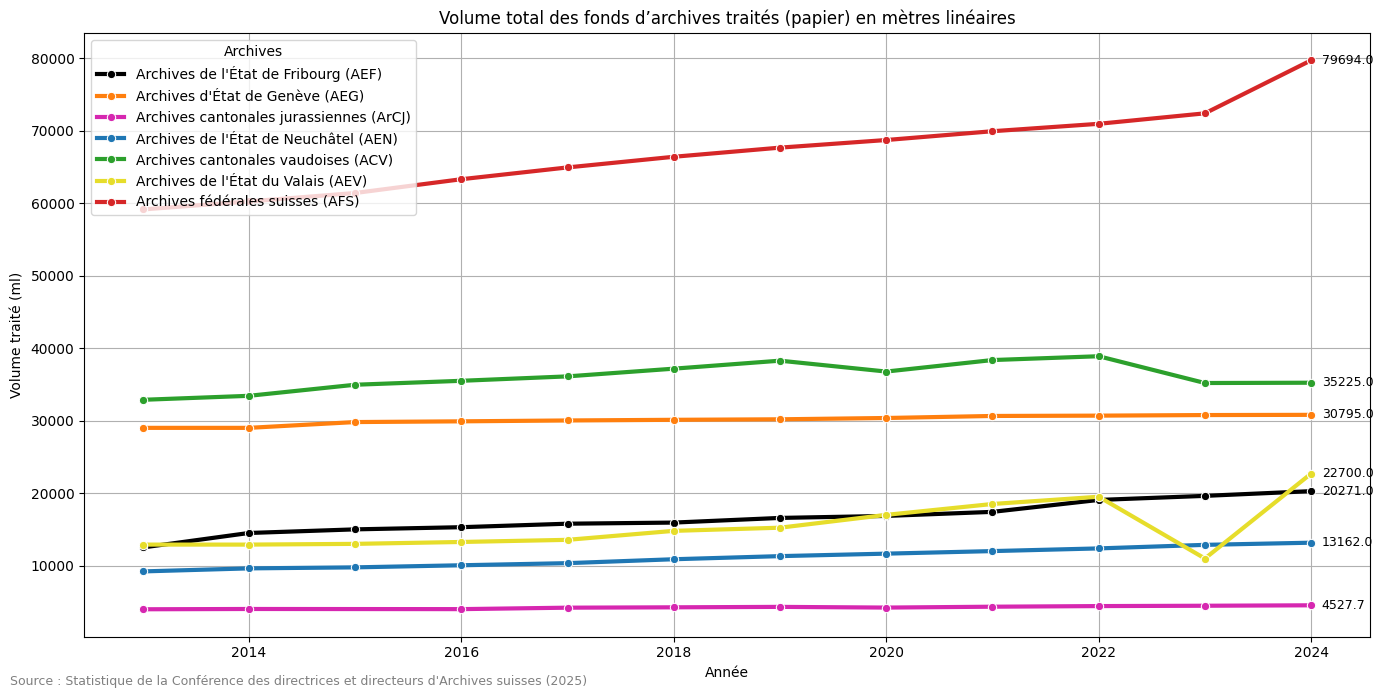

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Charger les données
df = pd.read_excel("statistiques_archives_suisses.xlsx")

# 2. Extraire les colonnes nécessaires
df_clean = df[['archives', 'Date', 'Volume total des fonds d’archives traités (papier) en mètres linéaires']].copy()
df_clean.columns = ['Archives', 'Année', 'Volume_papier_ml']

# 3. Conversion des types
df_clean['Année'] = pd.to_numeric(df_clean['Année'], errors='coerce')
df_clean['Volume_papier_ml'] = pd.to_numeric(df_clean['Volume_papier_ml'], errors='coerce')

# 4. Grille complète pour garantir des lignes continues
archives_uniques = df_clean['Archives'].dropna().unique()
annees = range(int(df_clean['Année'].min()), int(df_clean['Année'].max()) + 1)
grille = pd.MultiIndex.from_product([annees, archives_uniques], names=['Année', 'Archives']).to_frame(index=False)
df_complet = pd.merge(grille, df_clean, on=['Année', 'Archives'], how='left')

# 5. Palette personnalisée
palette_custom_base = {
    "Archives d'État de Genève (AEG)": '#ff7f0e',
    "Archives cantonales vaudoises (ACV)": '#2ca02c',
    "Archives de l'état de Neuchatel": "#b6f550",
    "Archives cantonales jurassiennes (ArCJ)": "#d627b0",
    "Archives de l'État de Fribourg (AEF)": "#000000",
    "Archives de l'État du Valais (AEV)": "#e6dd2b",
    "Archives fédérales suisses (AFS)": '#d62728',
}
remaining_archives = [a for a in archives_uniques if a not in palette_custom_base]
auto_palette = sns.color_palette("tab20", len(remaining_archives))
palette_custom = palette_custom_base.copy()
palette_custom.update(dict(zip(remaining_archives, auto_palette)))

# 6. Visualisation
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_complet,
    x='Année',
    y='Volume_papier_ml',
    hue='Archives',
    palette=palette_custom,
    marker='o',
    linewidth=3.0
)

# 7. Étiquettes sur les derniers points non superposés
min_vertical_distance = 5
used_y = []

last_points = (
    df_complet
    .dropna(subset=['Volume_papier_ml'])
    .sort_values('Année')
    .groupby('Archives')
    .tail(1)
)

for _, row in last_points.iterrows():
    y_val = row['Volume_papier_ml']
    if all(abs(y_val - used) > min_vertical_distance for used in used_y):
        plt.text(row['Année'] + 0.1, y_val, f"{round(y_val, 1)}",
                 ha='left', va='center', fontsize=9, color='black')
        used_y.append(y_val)

# 8. Mise en forme
plt.title("Volume total des fonds d’archives traités (papier) en mètres linéaires")
plt.xlabel("Année")
plt.ylabel("Volume traité (ml)")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Archives", loc='upper left')

# 9. Source en bas à gauche
plt.figtext(
    0.01, 0.01,
    "Source : Statistique de la Conférence des directrices et directeurs d'Archives suisses (2025)",
    fontsize=9,
    ha='left',
    va='bottom',
    color='gray'
)

plt.show()


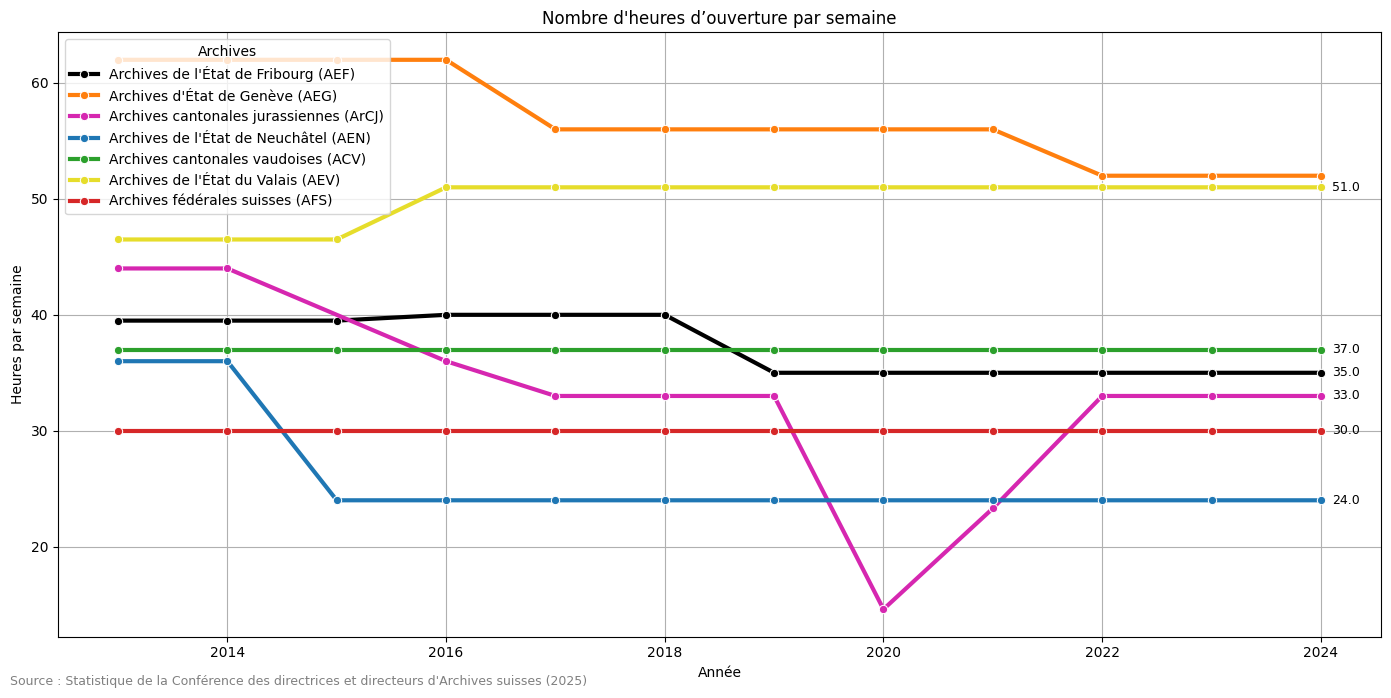

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Charger les données
df = pd.read_excel("statistiques_archives_suisses.xlsx")

# 2. Extraire les colonnes nécessaires
df_clean = df[['archives', 'Date', "Nombre d'heures d’ouverture par semaine"]].copy()
df_clean.columns = ['Archives', 'Année', 'Heures_ouverture']

# 3. Conversion des types
df_clean['Année'] = pd.to_numeric(df_clean['Année'], errors='coerce')
df_clean['Heures_ouverture'] = pd.to_numeric(df_clean['Heures_ouverture'], errors='coerce')

# 4. Grille complète Année × Archives
archives_uniques = df_clean['Archives'].dropna().unique()
annees = range(int(df_clean['Année'].min()), int(df_clean['Année'].max()) + 1)
grille = pd.MultiIndex.from_product([annees, archives_uniques], names=['Année', 'Archives']).to_frame(index=False)
df_complet = pd.merge(grille, df_clean, on=['Année', 'Archives'], how='left')

# 5. Palette personnalisée
palette_custom_base = {
    "Archives d'État de Genève (AEG)": '#ff7f0e',
    "Archives cantonales vaudoises (ACV)": '#2ca02c',
    "Archives de l'état de Neuchatel": "#b6f550",
    "Archives cantonales jurassiennes (ArCJ)": "#d627b0",
    "Archives de l'État de Fribourg (AEF)": "#000000",
    "Archives de l'État du Valais (AEV)": "#e6dd2b",
    "Archives fédérales suisses (AFS)": '#d62728',
}
remaining_archives = [a for a in archives_uniques if a not in palette_custom_base]
auto_palette = sns.color_palette("tab20", len(remaining_archives))
palette_custom = palette_custom_base.copy()
palette_custom.update(dict(zip(remaining_archives, auto_palette)))

# 6. Visualisation
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_complet,
    x='Année',
    y='Heures_ouverture',
    hue='Archives',
    palette=palette_custom,
    marker='o',
    linewidth=3.0
)

# 7. Étiquettes lisibles à droite des derniers points
min_vertical_distance = 1.0
used_y = []

last_points = (
    df_complet
    .dropna(subset=['Heures_ouverture'])
    .sort_values('Année')
    .groupby('Archives')
    .tail(1)
)

for _, row in last_points.iterrows():
    y_val = row['Heures_ouverture']
    if all(abs(y_val - used) > min_vertical_distance for used in used_y):
        plt.text(row['Année'] + 0.1, y_val, f"{round(y_val, 1)}",
                 ha='left', va='center', fontsize=9, color='black')
        used_y.append(y_val)

# 8. Mise en forme
plt.title("Nombre d'heures d’ouverture par semaine")
plt.xlabel("Année")
plt.ylabel("Heures par semaine")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Archives", loc='upper left')

# 9. Citation de la source
plt.figtext(
    0.01, 0.01,
    "Source : Statistique de la Conférence des directrices et directeurs d'Archives suisses (2025)",
    fontsize=9,
    ha='left',
    va='bottom',
    color='gray'
)

plt.show()


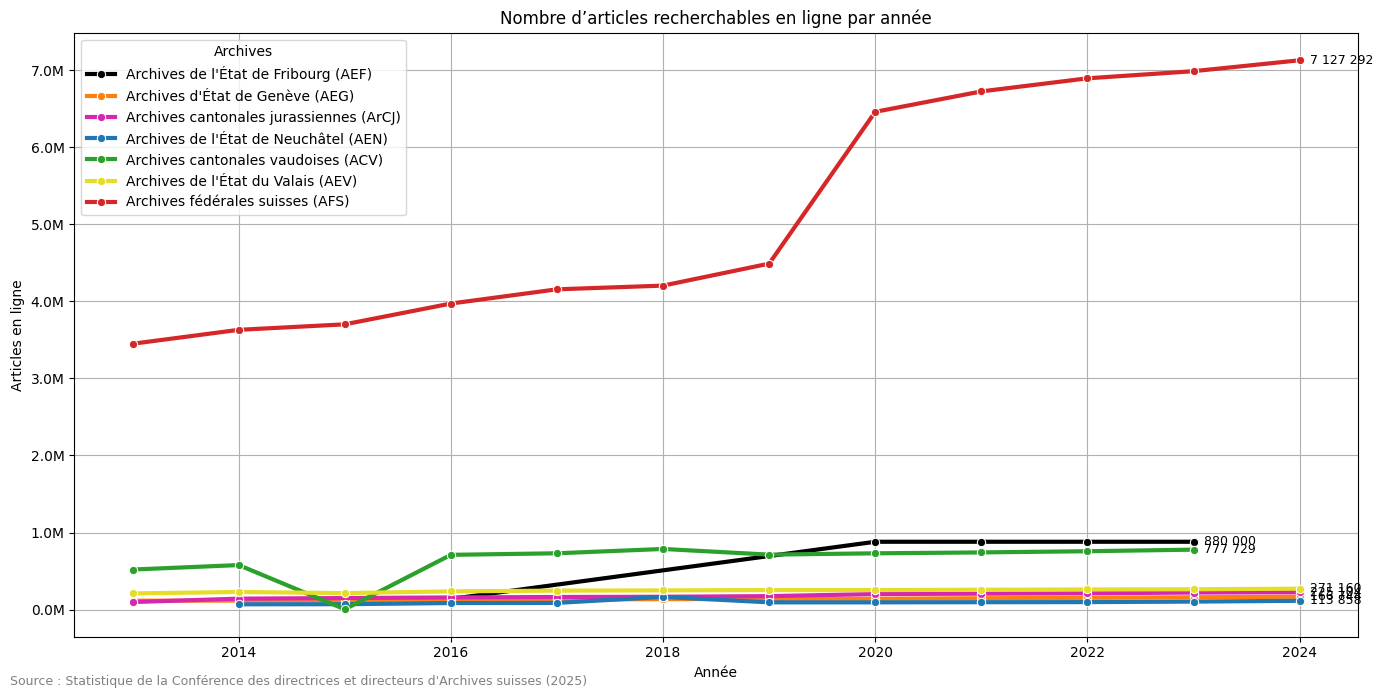

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 1. Charger les données
df = pd.read_excel("statistiques_archives_suisses.xlsx")

# 2. Extraire les colonnes nécessaires
df_clean = df[['archives', 'Date', 'Nombre d’articles recherchables en ligne']].copy()
df_clean.columns = ['Archives', 'Année', 'Articles_recherchables']

# 3. Conversion des types
df_clean['Année'] = pd.to_numeric(df_clean['Année'], errors='coerce')
df_clean['Articles_recherchables'] = pd.to_numeric(df_clean['Articles_recherchables'], errors='coerce')

# 4. Grille complète Année × Archives
archives_uniques = df_clean['Archives'].dropna().unique()
annees = range(int(df_clean['Année'].min()), int(df_clean['Année'].max()) + 1)
grille = pd.MultiIndex.from_product([annees, archives_uniques], names=['Année', 'Archives']).to_frame(index=False)
df_complet = pd.merge(grille, df_clean, on=['Année', 'Archives'], how='left')

# 5. Palette personnalisée
palette_custom_base = {
    "Archives d'État de Genève (AEG)": '#ff7f0e',
    "Archives cantonales vaudoises (ACV)": '#2ca02c',
    "Archives de l'état de Neuchatel": "#b6f550",
    "Archives cantonales jurassiennes (ArCJ)": "#d627b0",
    "Archives de l'État de Fribourg (AEF)": "#000000",
    "Archives de l'État du Valais (AEV)": "#e6dd2b",
    "Archives fédérales suisses (AFS)": '#d62728',
}
remaining_archives = [a for a in archives_uniques if a not in palette_custom_base]
auto_palette = sns.color_palette("tab20", len(remaining_archives))
palette_custom = palette_custom_base.copy()
palette_custom.update(dict(zip(remaining_archives, auto_palette)))

# 6. Visualisation
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_complet,
    x='Année',
    y='Articles_recherchables',
    hue='Archives',
    palette=palette_custom,
    marker='o',
    linewidth=3.0
)

# Format Y en millions
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M')
)
# 7. Étiquettes lisibles à droite des derniers points non superposés
min_vertical_distance = 10000
used_y = []

last_points = (
    df_complet
    .dropna(subset=['Articles_recherchables'])
    .sort_values('Année')
    .groupby('Archives')
    .tail(1)
)

for _, row in last_points.iterrows():
    y_val = row['Articles_recherchables']
    if all(abs(y_val - used) > min_vertical_distance for used in used_y):
        plt.text(row['Année'] + 0.1, y_val, f"{int(y_val):,}".replace(',', ' '),
                 ha='left', va='center', fontsize=9, color='black')
        used_y.append(y_val)

# 8. Mise en forme
plt.title("Nombre d’articles recherchables en ligne par année")
plt.xlabel("Année")
plt.ylabel("Articles en ligne")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Archives", loc='upper left')

# 9. Source
plt.figtext(
    0.01, 0.01,
    "Source : Statistique de la Conférence des directrices et directeurs d'Archives suisses (2025)",
    fontsize=9,
    ha='left',
    va='bottom',
    color='gray'
)

plt.show()


C:\Users\rroll\AppData\Local\Temp\ipykernel_29876\2072228865.py:26: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  .pct_change() * 100


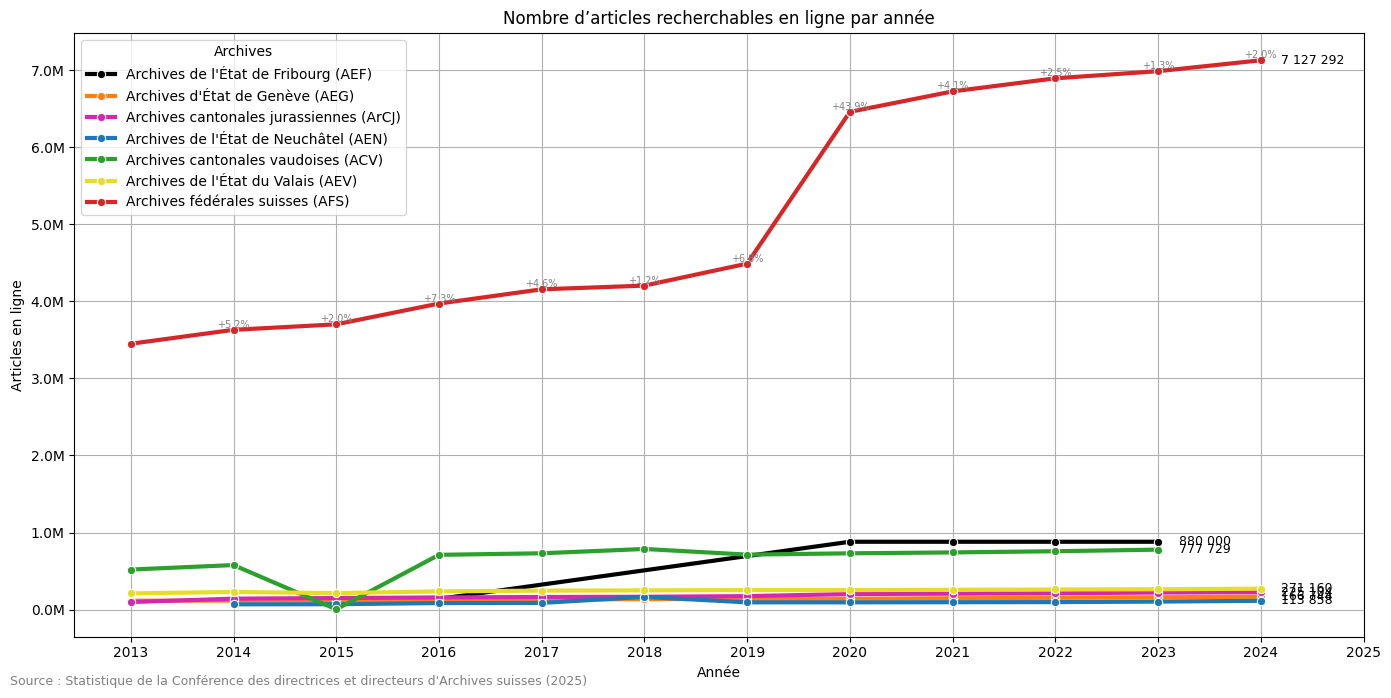

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 1. Charger les données
df = pd.read_excel("statistiques_archives_suisses.xlsx")

# 2. Nettoyage et renommage
df_clean = df[['archives', 'Date', 'Nombre d’articles recherchables en ligne']].copy()
df_clean.columns = ['Archives', 'Année', 'Articles_recherchables']
df_clean['Année'] = pd.to_numeric(df_clean['Année'], errors='coerce')
df_clean['Articles_recherchables'] = pd.to_numeric(df_clean['Articles_recherchables'], errors='coerce')

# 3. Grille complète Archives × Années (jusqu’à 2025)
archives_uniques = df_clean['Archives'].dropna().unique()
annees = list(range(int(df_clean['Année'].min()), 2026))
grille = pd.MultiIndex.from_product([annees, archives_uniques], names=['Année', 'Archives']).to_frame(index=False)
df_complet = pd.merge(grille, df_clean, on=['Année', 'Archives'], how='left')

# 4. Calcul de la variation en pourcentage
df_complet['Variation_%'] = (
    df_complet
    .sort_values(['Archives', 'Année'])
    .groupby('Archives')['Articles_recherchables']
    .pct_change() * 100
).round(1)

# 5. Palette personnalisée
palette_custom_base = {
    "Archives d'État de Genève (AEG)": '#ff7f0e',
    "Archives cantonales vaudoises (ACV)": '#2ca02c',
    "Archives de l'état de Neuchatel": "#b6f550",
    "Archives cantonales jurassiennes (ArCJ)": "#d627b0",
    "Archives de l'État de Fribourg (AEF)": "#000000",
    "Archives de l'État du Valais (AEV)": "#e6dd2b",
    "Archives fédérales suisses (AFS)": '#d62728',
}
remaining_archives = [a for a in archives_uniques if a not in palette_custom_base]
auto_palette = sns.color_palette("tab20", len(remaining_archives))
palette_custom = palette_custom_base.copy()
palette_custom.update(dict(zip(remaining_archives, auto_palette)))

# 6. Visualisation
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_complet,
    x='Année',
    y='Articles_recherchables',
    hue='Archives',
    palette=palette_custom,
    marker='o',
    linewidth=3.0
)

# 7. Axe Y en millions
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M')
)

# 8. Affichage des variations uniquement pour les AFS
for _, row in df_complet.dropna(subset=['Articles_recherchables', 'Variation_%']).iterrows():
    if row['Archives'] == "Archives fédérales suisses (AFS)":
        variation = row['Variation_%']
        signe = '+' if variation > 0 else ''
        plt.text(
            row['Année'],
            row['Articles_recherchables'] + 25000,  # décalage augmenté
            f"{signe}{variation}%",
            fontsize=7,
            color='gray',
            ha='center'
        )

# 9. Affichage des valeurs absolues sur les derniers points
last_points = (
    df_complet
    .dropna(subset=['Articles_recherchables'])
    .sort_values('Année')
    .groupby('Archives')
    .tail(1)
)

min_vertical_distance = 10000
used_y = []

for _, row in last_points.iterrows():
    y_val = row['Articles_recherchables']
    if all(abs(y_val - used) > min_vertical_distance for used in used_y):
        plt.text(
            row['Année'] + 0.2,
            y_val,
            f"{int(y_val):,}".replace(',', ' '),
            ha='left',
            va='center',
            fontsize=9,
            color='black'
        )
        used_y.append(y_val)

# 10. Axe X de toutes les années jusqu’en 2025
plt.xticks(ticks=list(range(int(df_complet['Année'].min()), 2026)))

# 11. Mise en forme
plt.title("Nombre d’articles recherchables en ligne par année")
plt.xlabel("Année")
plt.ylabel("Articles en ligne")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Archives", loc='upper left')

# 12. Source
plt.figtext(
    0.01, 0.01,
    "Source : Statistique de la Conférence des directrices et directeurs d'Archives suisses (2025)",
    fontsize=9,
    ha='left',
    va='bottom',
    color='gray'
)

plt.show()


C:\Users\rroll\AppData\Local\Temp\ipykernel_29876\976724863.py:27: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  .pct_change() * 100


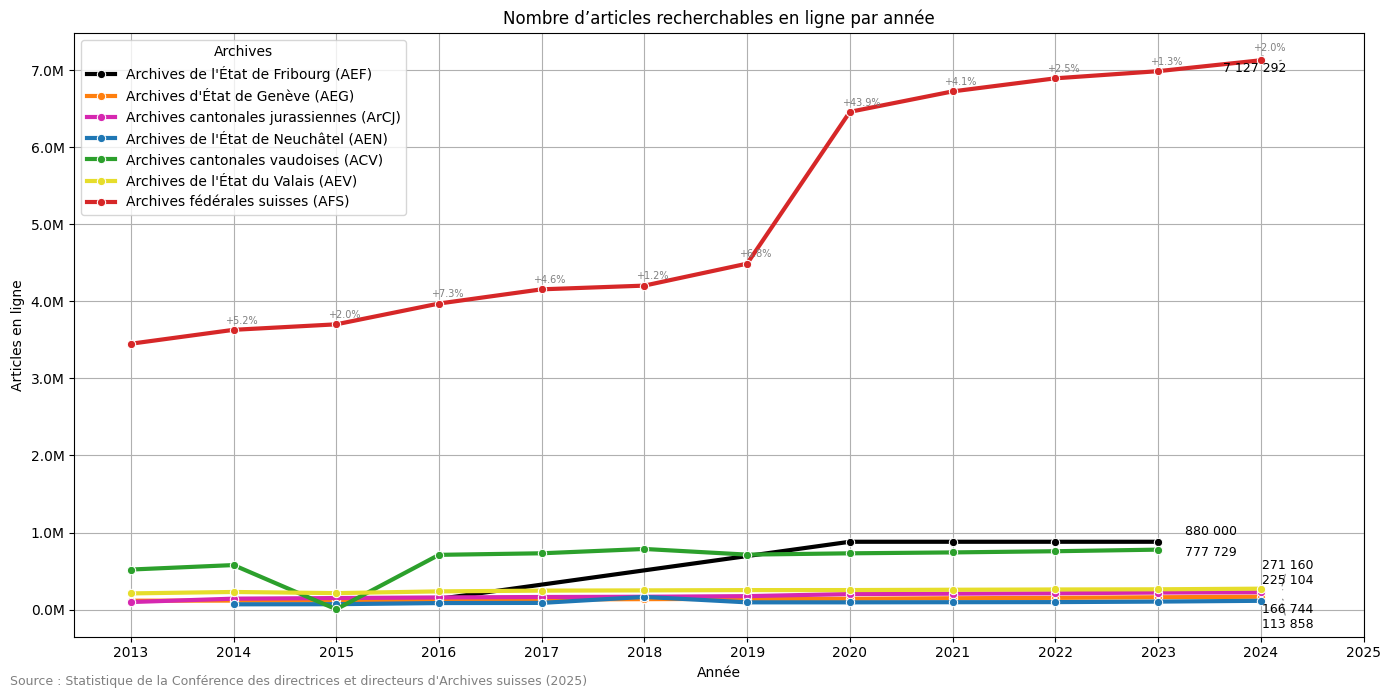

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from adjustText import adjust_text

# Charger les données
df = pd.read_excel("statistiques_archives_suisses.xlsx")

# Nettoyage
df_clean = df[['archives', 'Date', 'Nombre d’articles recherchables en ligne']].copy()
df_clean.columns = ['Archives', 'Année', 'Articles_recherchables']
df_clean['Année'] = pd.to_numeric(df_clean['Année'], errors='coerce')
df_clean['Articles_recherchables'] = pd.to_numeric(df_clean['Articles_recherchables'], errors='coerce')

# Grille complète (2025 inclus)
archives_uniques = df_clean['Archives'].dropna().unique()
annees = list(range(int(df_clean['Année'].min()), 2026))
grille = pd.MultiIndex.from_product([annees, archives_uniques], names=['Année', 'Archives']).to_frame(index=False)
df_complet = pd.merge(grille, df_clean, on=['Année', 'Archives'], how='left')

# Calcul variation %
df_complet['Variation_%'] = (
    df_complet
    .sort_values(['Archives', 'Année'])
    .groupby('Archives')['Articles_recherchables']
    .pct_change() * 100
).round(1)

# Palette couleurs
palette_custom_base = {
    "Archives d'État de Genève (AEG)": '#ff7f0e',
    "Archives cantonales vaudoises (ACV)": '#2ca02c',
    "Archives de l'état de Neuchatel": "#b6f550",
    "Archives cantonales jurassiennes (ArCJ)": "#d627b0",
    "Archives de l'État de Fribourg (AEF)": "#000000",
    "Archives de l'État du Valais (AEV)": "#e6dd2b",
    "Archives fédérales suisses (AFS)": '#d62728',
}
remaining_archives = [a for a in archives_uniques if a not in palette_custom_base]
auto_palette = sns.color_palette("tab20", len(remaining_archives))
palette_custom = palette_custom_base.copy()
palette_custom.update(dict(zip(remaining_archives, auto_palette)))

# Derniers points
last_points = (
    df_complet
    .dropna(subset=['Articles_recherchables'])
    .sort_values('Année')
    .groupby('Archives')
    .tail(1)
)

# Visualisation
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_complet,
    x='Année',
    y='Articles_recherchables',
    hue='Archives',
    palette=palette_custom,
    marker='o',
    linewidth=3.0
)

# Axe Y millions
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))

# Libellés ajustables
texts = []

# Variations uniquement pour AFS
for _, row in df_complet.dropna(subset=['Articles_recherchables', 'Variation_%']).iterrows():
    if row['Archives'] == "Archives fédérales suisses (AFS)":
        variation = row['Variation_%']
        signe = '+' if variation > 0 else ''
        texts.append(plt.text(
            row['Année'],
            row['Articles_recherchables'] + 25000,
            f"{signe}{variation}%",
            fontsize=7,
            color='gray',
            ha='center'
        ))

# Valeur absolue sur dernier point
used_y = []
for _, row in last_points.iterrows():
    y_val = row['Articles_recherchables']
    if all(abs(y_val - used) > 10000 for used in used_y):
        texts.append(plt.text(
            row['Année'] + 0.2,
            y_val,
            f"{int(y_val):,}".replace(',', ' '),
            ha='left',
            va='center',
            fontsize=9,
            color='black'
        ))
        used_y.append(y_val)

# Ajustement anti-collision
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

# Axe X
plt.xticks(ticks=list(range(int(df_clean['Année'].min()), 2026)))

# Mise en page
plt.title("Nombre d’articles recherchables en ligne par année")
plt.xlabel("Année")
plt.ylabel("Articles en ligne")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Archives", loc='upper left')
plt.figtext(
    0.01, 0.01,
    "Source : Statistique de la Conférence des directrices et directeurs d'Archives suisses (2025)",
    fontsize=9, ha='left', va='bottom', color='gray'
)

plt.show()


C:\Users\rroll\AppData\Local\Temp\ipykernel_29876\1886502072.py:27: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  .pct_change() * 100


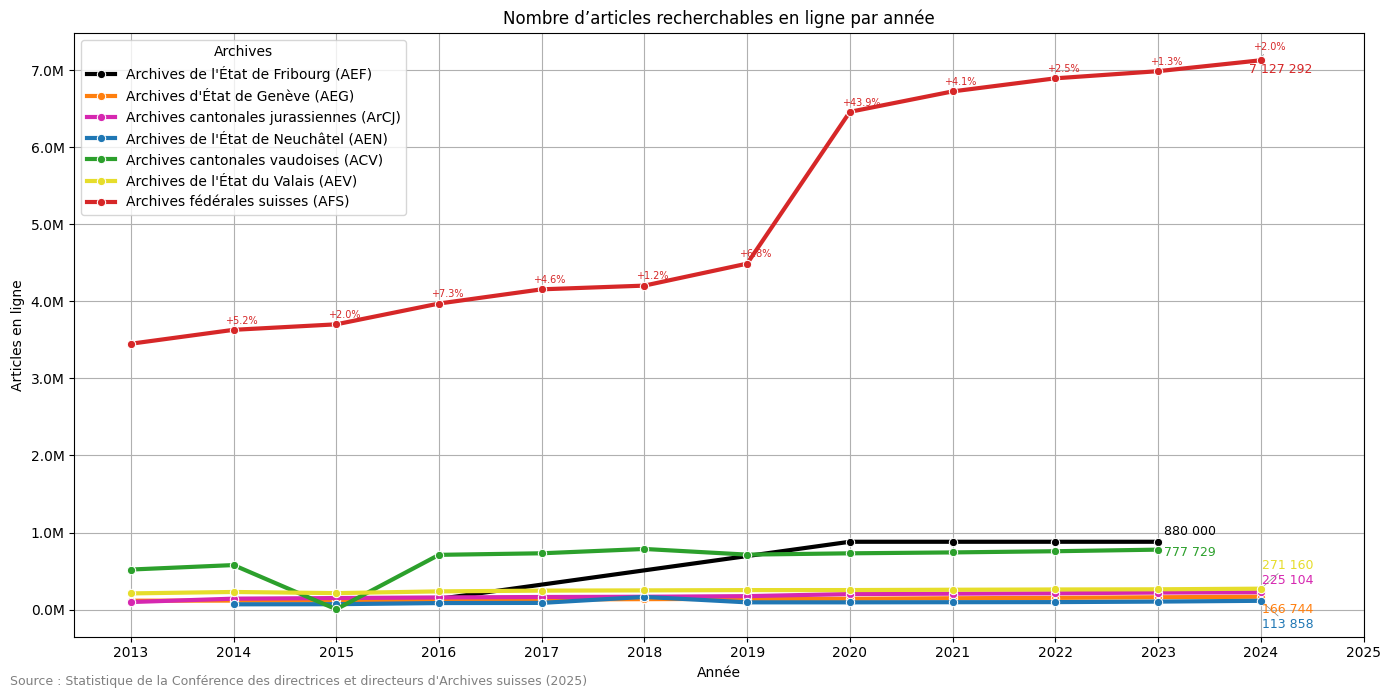

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from adjustText import adjust_text

# 1. Charger les données
df = pd.read_excel("statistiques_archives_suisses.xlsx")

# 2. Extraire et renommer les colonnes
df_clean = df[['archives', 'Date', 'Nombre d’articles recherchables en ligne']].copy()
df_clean.columns = ['Archives', 'Année', 'Articles_recherchables']
df_clean['Année'] = pd.to_numeric(df_clean['Année'], errors='coerce')
df_clean['Articles_recherchables'] = pd.to_numeric(df_clean['Articles_recherchables'], errors='coerce')

# 3. Étendre les années jusqu'à 2025
archives_uniques = df_clean['Archives'].dropna().unique()
annees = list(range(int(df_clean['Année'].min()), 2026))
grille = pd.MultiIndex.from_product([annees, archives_uniques], names=['Année', 'Archives']).to_frame(index=False)
df_complet = pd.merge(grille, df_clean, on=['Année', 'Archives'], how='left')

# 4. Calculer la variation en pourcentage
df_complet['Variation_%'] = (
    df_complet
    .sort_values(['Archives', 'Année'])
    .groupby('Archives')['Articles_recherchables']
    .pct_change() * 100
).round(1)

# 5. Définir la palette de couleurs
palette_custom_base = {
    "Archives d'État de Genève (AEG)": '#ff7f0e',
    "Archives cantonales vaudoises (ACV)": '#2ca02c',
    "Archives de l'état de Neuchatel": "#b6f550",
    "Archives cantonales jurassiennes (ArCJ)": "#d627b0",
    "Archives de l'État de Fribourg (AEF)": "#000000",
    "Archives de l'État du Valais (AEV)": "#e6dd2b",
    "Archives fédérales suisses (AFS)": '#d62728',
}
remaining_archives = [a for a in archives_uniques if a not in palette_custom_base]
auto_palette = sns.color_palette("tab20", len(remaining_archives))
palette_custom = palette_custom_base.copy()
palette_custom.update(dict(zip(remaining_archives, auto_palette)))

# 6. Visualisation
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_complet,
    x='Année',
    y='Articles_recherchables',
    hue='Archives',
    palette=palette_custom,
    marker='o',
    linewidth=3.0
)

# 7. Formater l'axe Y en millions
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))

# 8. Ajouter les variations pour AFS
texts = []
for _, row in df_complet.dropna(subset=['Articles_recherchables', 'Variation_%']).iterrows():
    if row['Archives'] == "Archives fédérales suisses (AFS)":
        variation = row['Variation_%']
        signe = '+' if variation > 0 else ''
        texts.append(plt.text(
            row['Année'],
            row['Articles_recherchables'] + 25000,  # espace vertical
            f"{signe}{variation}%",
            fontsize=7,
            color=palette_custom[row['Archives']],
            ha='center'
        ))

# 9. Ajouter le nombre total d’articles pour le dernier point (droite)
last_points = (
    df_complet
    .dropna(subset=['Articles_recherchables'])
    .sort_values('Année')
    .groupby('Archives')
    .tail(1)
)

used_y = []
for _, row in last_points.iterrows():
    y_val = row['Articles_recherchables']
    if all(abs(y_val - used) > 20000 for used in used_y):
        texts.append(plt.text(
            row['Année'] + 0.0,
            y_val,
            f"{int(y_val):,}".replace(',', ' '),
            ha='left',
            va='center',
            fontsize=9,
            color=palette_custom[row['Archives']]
        ))
        used_y.append(y_val)

# 10. Éviter les chevauchements
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

# 11. Axe X de 2005 à 2025
plt.xticks(ticks=list(range(int(df_clean['Année'].min()), 2026)))

# 12. Mise en page finale
plt.title("Nombre d’articles recherchables en ligne par année")
plt.xlabel("Année")
plt.ylabel("Articles en ligne")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Archives", loc='upper left')
plt.figtext(
    0.01, 0.01,
    "Source : Statistique de la Conférence des directrices et directeurs d'Archives suisses (2025)",
    fontsize=9,
    ha='left',
    va='bottom',
    color='gray'
)

plt.show()
